<h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; color: #ffffff; text-align: center; line-height: 0.75;background-color: #000000"><b>Dataset Super Store</b></h1>

Nama Anggota Kelompok:
> - Khalid Akbar
> - Evan Hadyan
> - M. Ainul Yaqin
> - M. Riki Dharmawan
> - Rahmatuel Samuel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults
from pmdarima import auto_arima
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.tools import diff
from pylab import rcParams
from math import pi
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import pmdarima as pm
from math import sqrt

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('superstore.csv')
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [3]:
df.drop('Row ID',axis = 1, inplace = True)
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])

<h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; color: #ffffff; text-align: center; line-height: 0.75;background-color: #000000"><b>Top 5 Product Sales</b></h1>

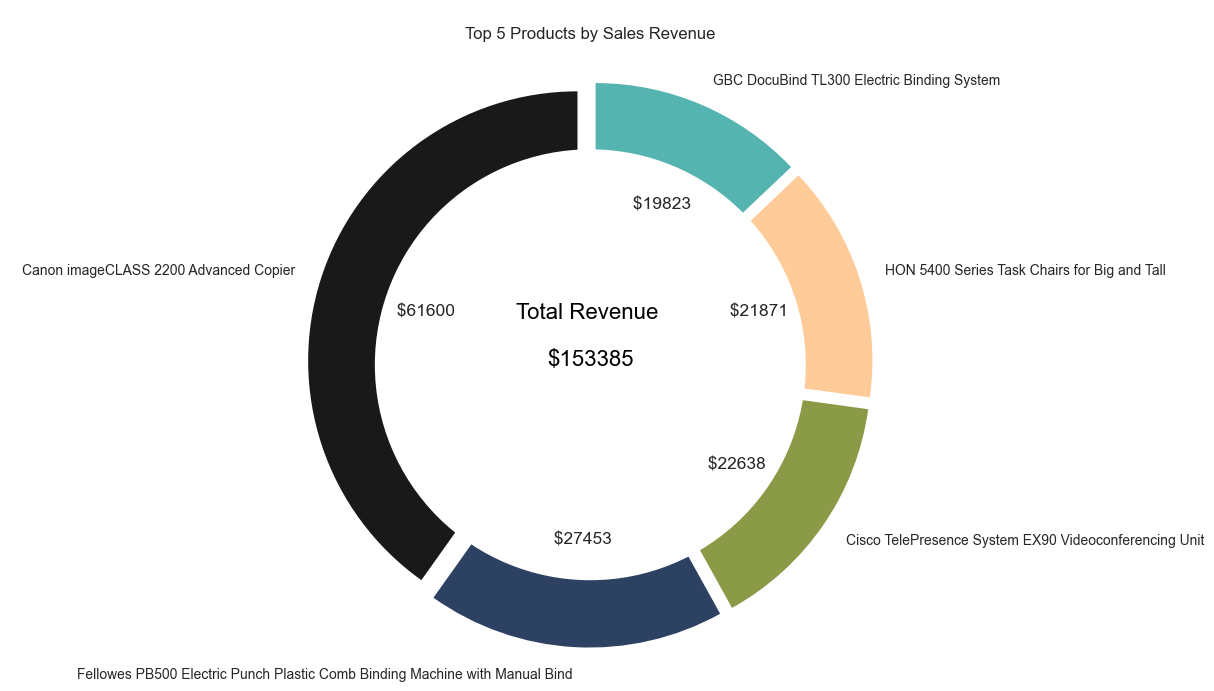

In [4]:
# Sam
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return ' ${v:d}'.format(v=val)
    return my_format

top_five_products = df.groupby(["Product Name"]).sum().sort_values("Sales",ascending=False).head(5)
top_five_products = top_five_products[["Sales"]].round(2)
top_five_products.reset_index(inplace=True)

total_revenue_products = top_five_products["Sales"].sum()
total_revenue_products = str(int(total_revenue_products))
total_revenue_products = '$' + total_revenue_products

plt.rcParams["figure.figsize"] = (13,7)
plt.rcParams['font.size'] = 12.5
colors = ['#191919','#2D4263','#8B9A46','#ffcc99','#55B4B0']
explode = (0.05,0.05,0.05,0.05,0.05)

fig1, ax1 = plt.subplots()
ax1.pie(top_five_products['Sales'], colors = colors, labels=top_five_products['Product Name'],
        autopct= autopct_format(top_five_products['Sales']), startangle=90,explode=explode
       )

centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
label = ax1.annotate('Total Revenue \n'+"\n"+str(total_revenue_products),color = 'black', xy=(0, 0), fontsize=16, ha="center")
plt.title("\nTop 5 Products by Sales Revenue\n")
plt.tight_layout()
plt.savefig('Top 5 product sales.png')

<h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; color: #ffffff; text-align: center; line-height: 0.75;background-color: #000000"><b>Customer Frequency Purchases</b></h1>

In [5]:
def frequency(x):
    if x > 20:
        return 'many'
    else:
        return 'few'

In [6]:
cust_freq=df.groupby('Customer Name').size().sort_values(ascending=False).reset_index(name='freq')

In [7]:
cust_freq['category'] = cust_freq['freq'].apply(frequency)
few = cust_freq['category'].value_counts(normalize=True).mul(100).round(2)[0]

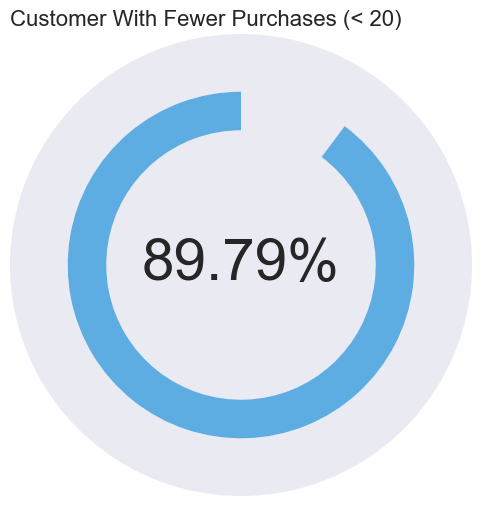

In [8]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection':'polar'})
data = few
startangle = 90
x = (data * pi *2)/ 100
left = (startangle * pi *2)/ 360 #this is to control where the bar starts
plt.xticks([])
plt.yticks([])
ax.spines.clear()
ax.barh(1, x, left=left, height=1, color='#5DADE2')
plt.ylim(-3, 3)
plt.title('Customer With Fewer Purchases (< 20)', fontsize=16, loc='left')
plt.text(0, -3, "89.79%", ha='center', va='center', fontsize=42)
plt.savefig('customer purchases 1.png')
plt.show()

In [9]:
df['Customer ID'].nunique()

793

Pada tahun 2015 sampai 2018 telah terjadi 4922 transaksi pembelian barang yang dilakukan oleh 793 customer.
- Terdapat 89.79% dari 793 customer tersebut melakukan pembelian kurang dari 21 kali.
- Hanya 10.21% dari 793 customer melakukan pembelian lebih dari 20 kali.

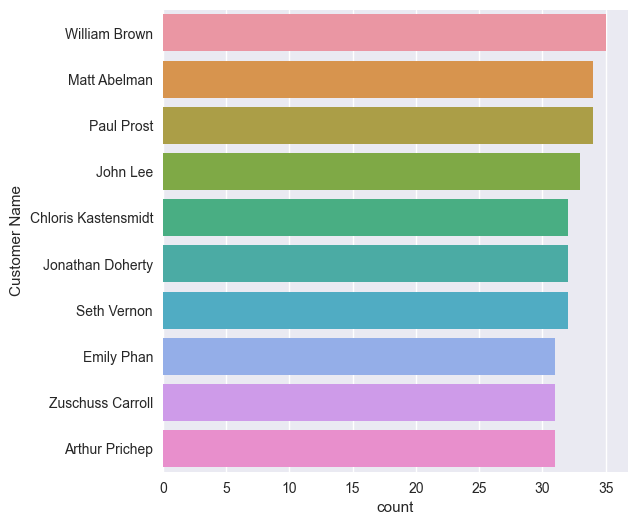

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.countplot(data=df, y='Customer Name', order=df['Customer Name'].value_counts().iloc[:10].index);

Diagram batang diatas adalah 10 customer yang melakukan pembelian terbanyak pada tahun 2015 sampai 2018

<h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; color: #ffffff; text-align: center; line-height: 0.75;background-color: #000000"><b>Jeda Hari Pengiriman</b></h1>

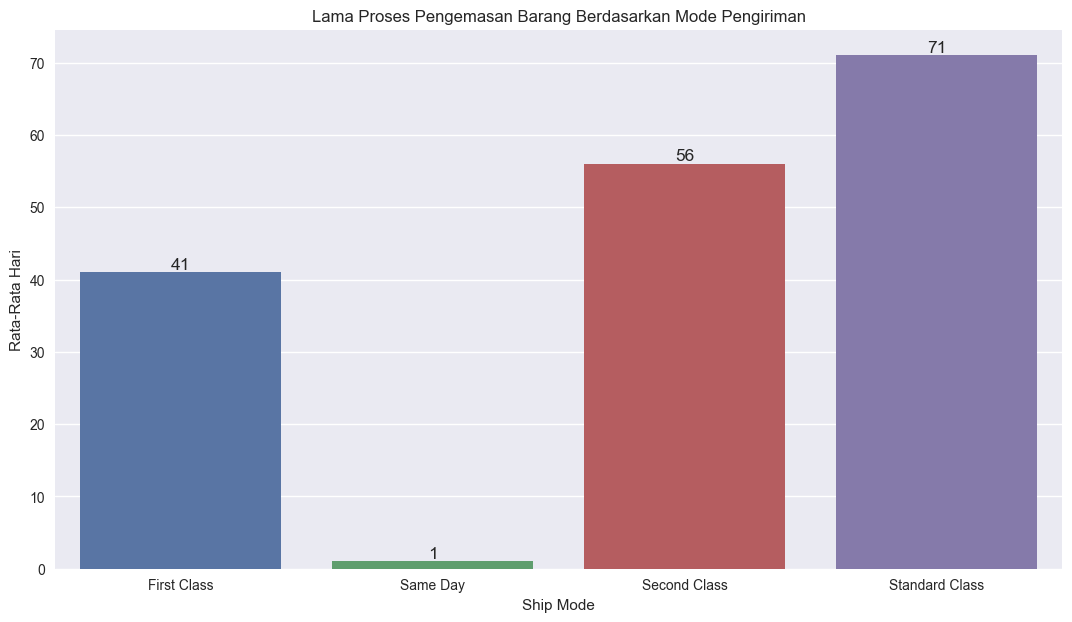

In [11]:
df['selisih'] = df['Ship Date'] - df['Order Date']
df['selisih'] = df['selisih'].dt.days
df.selisih = df.selisih.abs()
df2 = df.groupby('Ship Mode')[['selisih']].mean().round().reset_index()
p = sns.barplot(data = df2, x='Ship Mode', y='selisih', ci=None,)
for i in p.containers:
    p.bar_label(i)
plt.title('Lama Proses Pengemasan Barang Berdasarkan Mode Pengiriman')
plt.ylabel('Rata-Rata Hari')
plt.savefig('Jeda Pengiriman.png')
plt.show()

<h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; color: #ffffff; text-align: center; line-height: 0.75;background-color: #000000"><b>City based on Sales</b></h1>

In [12]:
state_sales = df.groupby('State')['Sales'].mean().reset_index().sort_values(by=['Sales'], ascending=False)

#top & bottom 5 city
def city(df, col1, col2):
    
    # create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(23, 8))

     # top 5 city
    sns.barplot(ax=ax[0], x=col2, y=col1, data=df.head(), ci=None, palette=['#f94144','#277da1','#277da1', '#277da1','#277da1'])
    for i in ax[0].containers:
        ax[0].bar_label(i,)
    ax[0].set_title('top 5 city based on sales 2015 - 2018')
    
    
    # bottom 5 city
    sns.barplot(ax=ax[1], x=col2, y=col1, data=df.tail(), ci=None, palette=['#277da1','#277da1', '#277da1','#277da1', '#f94144'])
    for i in ax[1].containers:
        ax[1].bar_label(i,)
    ax[1].set_title('bottom 5 city based on sales 2015 - 2018')

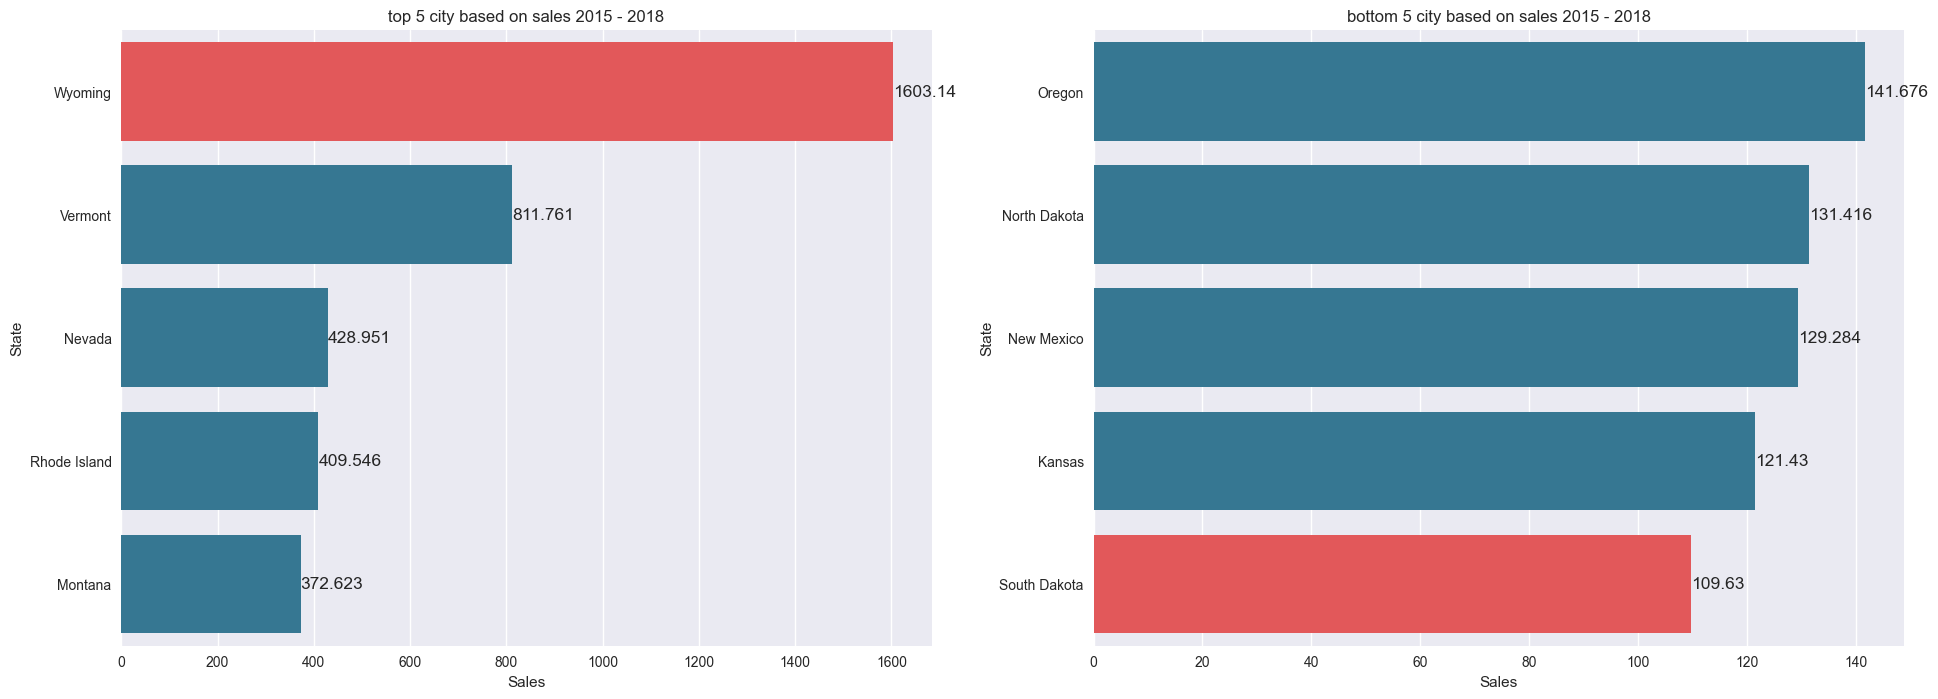

In [13]:
city(state_sales, 'State', 'Sales')

dari tahun 2015 hingga tahun 2018, dari seluruh negara bagian amerika maka :
1. negara bagian Wyoming, Vermont, Nevada, Rhode Island, Montana memiliki rata rata sales tertinggi dimana negara bagian wyoming memiliki rata rata sales sebesar 1603.14 dollar
2. neara bagian Oregon, North Dakota, New Mexico, kansas dan South Dakota memiliki rata raa sales terendah, dimana negara bagian South Dakota memiliki rata - rata sales terendah sebesar 109.63

<h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; color: #ffffff; text-align: center; line-height: 0.75;background-color: #000000"><b>The Most Bought Product</b></h1>

In [14]:
subcat_quantity = pd.DataFrame(df.groupby(['Sub-Category'])[['Sales']].sum().sort_values('Sales',ascending=False))
subcat_quantity = subcat_quantity.head()

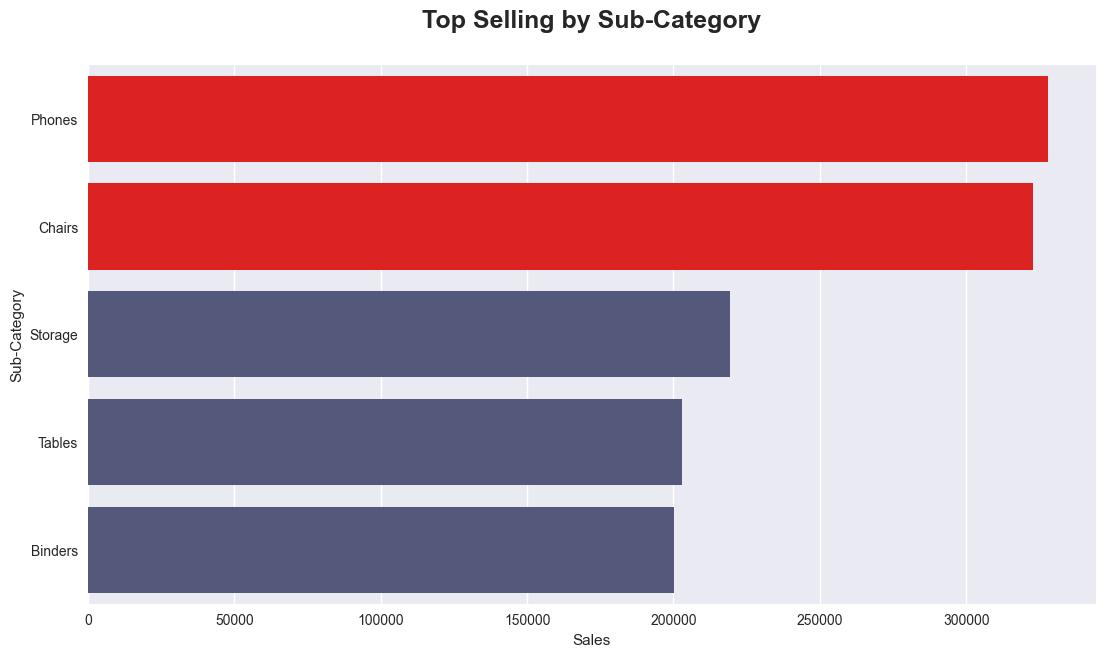

In [15]:
colors = ['#fc0303', '#fc0303', '#4d5482', '#4d5482', '#4d5482']
sns.barplot(data = subcat_quantity, y = subcat_quantity.index, x = subcat_quantity.Sales, palette = colors)

plt.title("Top Selling by Sub-Category", fontsize=18, pad=27, fontweight="bold")
plt.show()

 - For existing seller/manufacturer, the plot above tells that they need more stock especially on phones and chairs due to proven as high demand
 - for newcomer seller/manufacurer, the plot contains priceless information that lead to which comodity/goods have biggest market . Hence, the newcomer should take the opportunity up and do some new improvement/variance to attract more consumers 

<h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; color: #ffffff; text-align: center; line-height: 0.75;background-color: #000000"><b>Biggest Spenders City</b></h1>

In [16]:
df_gb = df.groupby(['Category','City']).agg({'Sales':sum})
g = df_gb['Sales'].groupby('Category', group_keys=False)
res = g.apply(lambda x: x.sort_values(ascending=False).head(3))
a = g.nlargest(3)
a = pd.DataFrame(a).reset_index()

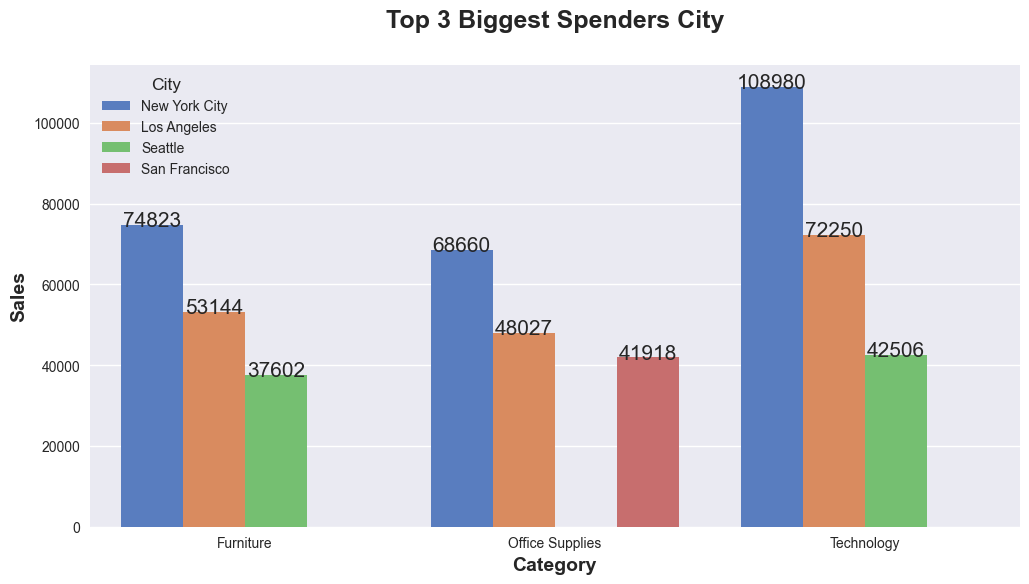

In [17]:
plt.figure(figsize=(12,6))
plots =sns.barplot(x = 'Category', y = 'Sales', hue = 'City', data = a, palette = "muted")
for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 3),
                   textcoords='offset points')
plt.title("Top 3 Biggest Spenders City", fontsize=18, pad=27, fontweight="bold")
plt.xlabel('Category', fontsize=14, fontweight="bold")
plt.ylabel('Sales', fontsize=14, fontweight="bold")
plt.show()

__Insight__:<br>
- It's not surprising result considering the 4 cities above are on top 10 most expensive cities in the us, with New York city, Los Angeles, San Franscisco, and Seattle respectively. Especially in New York, there’s something for everyone in this city – which happens to be among the richest in America, with a cost of living 87.2% higher than the national average, according to https://www.bestplaces.net/city/new_york/new_york
- Also, New York city and Los Angeles respectively are on the top list of the most populated state in US. So, with the big income multiply by population it's logical if the biggest sales on comodities/goods come from these two cities.

<h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; color: #000000; text-align: center; line-height: 0.75;background-color: #F6D55C"><b>Time Series Analysis</b></h1>

In [18]:
df.sort_values(by=['Order Date'], inplace=True, ascending=True)
df.set_index("Order Date", inplace = True)

In [19]:
data_forecast = pd.DataFrame(df['Sales'])
data_forecast

,Sales
Order Date,
2015-01-02,468.900
2015-01-03,5.940
2015-01-03,457.568
2015-01-03,17.472
2015-01-03,63.552
...,...
2018-12-30,52.776
2018-12-30,209.300
2018-12-30,90.930


In [20]:
data_weekly = pd.DataFrame(data_forecast['Sales'].resample('W').mean())
data_monthly = pd.DataFrame(data_forecast['Sales'].resample('M').mean())

In [21]:
data_weekly

,Sales
Order Date,
2015-01-04,186.129267
2015-01-11,258.833349
2015-01-18,325.164100
2015-01-25,140.570182
2015-02-01,128.688375
...,...
2018-12-02,347.823548
2018-12-09,148.198816
2018-12-16,159.337303


## Plot Data Checking

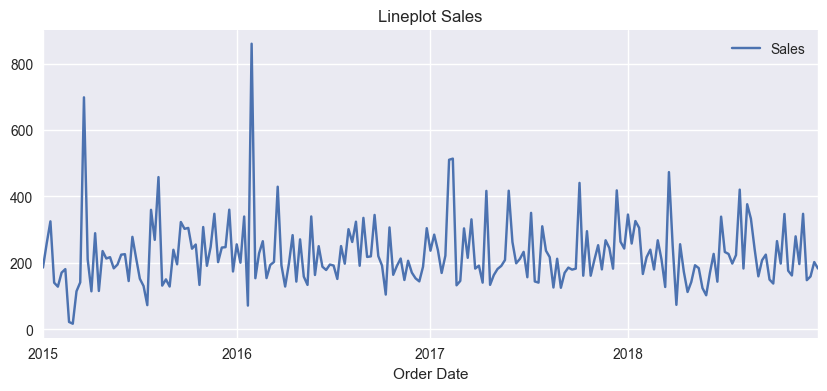

In [22]:
data_weekly.plot(figsize=(10,4)).autoscale(axis='x',tight=True);
plt.title('Lineplot Sales')
plt.show()

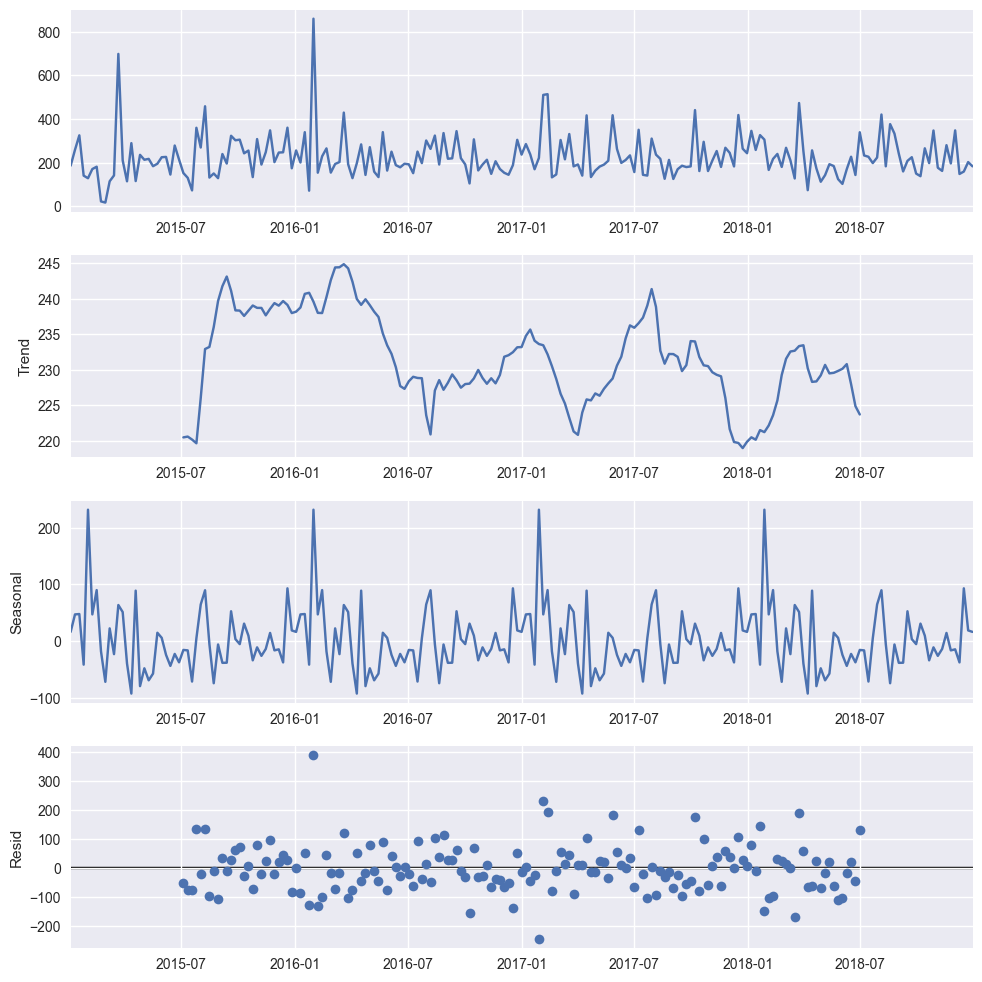

In [23]:
rcParams['figure.figsize'] = 10, 10
decomposition = sm.tsa.seasonal_decompose(data_weekly, model='add')
decomposition.plot()
plt.show();

## Check Stationarity

H0 : Data tidak stasioner terhadap mean

Daerah kritik: H0 ditolak jika |Test Statistic| > |critical value|

In [24]:
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

print(adf_test(data_weekly))

Results of Dickey-Fuller Test:
Test Statistic                -1.547227e+01
p-value                        2.620511e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.080000e+02
Critical Value (1%)           -3.462186e+00
Critical Value (5%)           -2.875538e+00
Critical Value (10%)          -2.574231e+00
dtype: float64
None


## Split Dataset

In [25]:
df_week = data_weekly.squeeze()

In [26]:
train_df = df_week.iloc[:int(np.ceil(len(df_week)*0.8))]
test_df = df_week.iloc[int(np.ceil(len(df_week)*0.8)):]

In [27]:
train_data = data_weekly.iloc[:int(np.ceil(len(data_weekly)*0.8))]
test_data = data_weekly.iloc[int(np.ceil(len(data_weekly)*0.8)):]

In [28]:
print(train_data.shape)
print(test_data.shape)

(168, 1)
(41, 1)


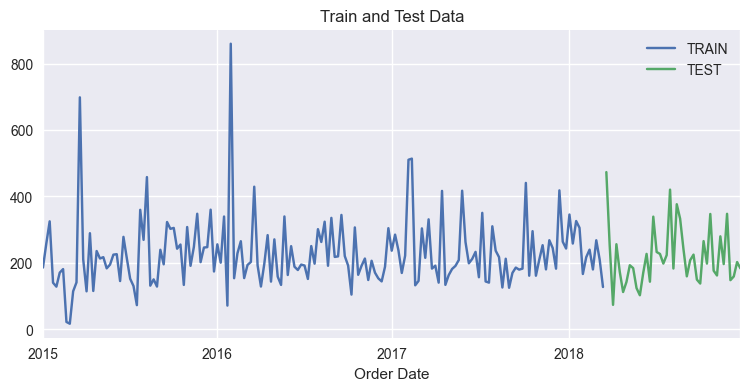

In [29]:
train_data['Sales'].plot(legend=True,label='TRAIN')
test_data['Sales'].plot(legend=True,label='TEST',figsize=(9,4))
plt.title('Train and Test Data');

<h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; color: #000000; text-align: center; line-height: 0.75;background-color: #F6D55C"><b>Exponential Smoothing</b></h1>

## Simple Exponential Smoothing

In [30]:
i = [0.05, 0.07, 0.09 ,0.1, 0.3, 0.5, 0.7, 0.9, 1.0]

evaluasi = pd.DataFrame({'level_smooth':[], 'test_mae':[], 'test_mse':[], 'test_rmse':[]})

for level in i:
    model = SimpleExpSmoothing(train_data['Sales'])
    fitted_model = model.fit(smoothing_level=level)
    forecast_model = fitted_model.forecast(steps=len(test_data))
    
    #test
    mae_test = mean_absolute_error(test_data, forecast_model)
    mse_test = mean_squared_error(test_data, forecast_model)
    rmse_test = np.sqrt(mean_squared_error(test_data, forecast_model))
    
    evaluasi = evaluasi.append({'level_smooth':level, 'test_mae':mae_test, 
                                'test_mse':mse_test, 'test_rmse':rmse_test}, ignore_index=True)

In [31]:
evaluasi.sort_values(by='test_rmse')

,level_smooth,test_mae,test_mse,test_rmse
3,0.10,69.350914,7604.845113,87.205763
2,0.09,69.725273,7631.467451,87.358271
1,0.07,70.243748,7670.511759,87.581458
0,0.05,70.387111,7680.931109,87.640921
4,0.30,63.523986,7819.952709,88.430496
5,0.50,67.000398,9257.535519,96.216088
6,0.70,75.601298,11370.571913,106.632884
7,0.90,88.427569,14170.584488,119.040264
8,1.00,95.520252,15693.202221,125.272512


In [32]:
model = SimpleExpSmoothing(train_data['Sales'])
fitted_model = model.fit(smoothing_level=0.1)
prediction_simple = fitted_model.forecast(steps=len(test_data))

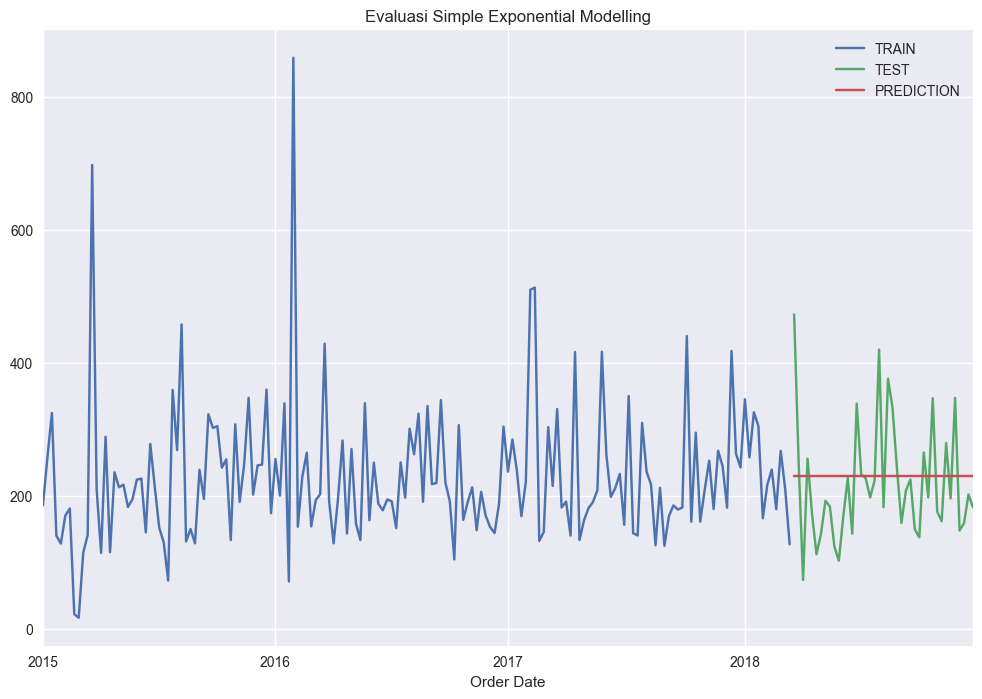

In [33]:
train_data['Sales'].plot(legend=True,label='TRAIN')
test_data['Sales'].plot(legend=True,label='TEST',figsize=(12,8))
prediction_simple.plot(legend=True,label='PREDICTION')
plt.title("Evaluasi Simple Exponential Modelling");

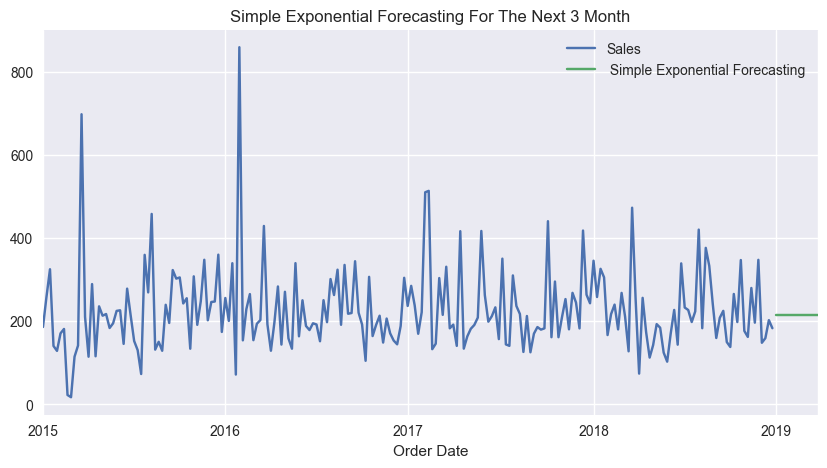

In [34]:
final_model_simple = SimpleExpSmoothing(data_weekly['Sales']).fit(smoothing_level=0.1)
forecast_predictions_simple = final_model_simple.forecast(len(test_data.tail(13)))

#plot
data_weekly['Sales'].plot(figsize=(10,5), legend=True)
forecast_predictions_simple.plot(legend=True, label=' Simple Exponential Forecasting')
plt.title('Simple Exponential Forecasting For The Next 3 Month');

Dari grafik hasil forecast diatas diketahui bahwa metode simple exponential smoothing menghasilkan hasil forecast yang konstan atau sama tiap periodenya (ditunjukkan dengan garis lurus berwarna hijau)

In [35]:
result_forecasting = pd.DataFrame(forecast_predictions_simple.reset_index(name='SES'))
result_forecasting.set_index('index', inplace=True)
result_forecasting

,SES
index,
2019-01-06,215.229735
2019-01-13,215.229735
2019-01-20,215.229735
2019-01-27,215.229735
2019-02-03,215.229735
2019-02-10,215.229735
2019-02-17,215.229735
2019-02-24,215.229735
2019-03-03,215.229735


## Holt's Exponential Smoothing

In [36]:
i = [0.5, 0.7, 0.9]

evaluasi = pd.DataFrame({'level_smooth':[], 'trend_smooth':[], 'test_mae':[], 'test_mse':[], 'test_rmse':[]})

for level in i:
    model = Holt(train_data['Sales'])
    fitted_model = model.fit(smoothing_level=0.1, smoothing_trend=level)
    forecast_model = fitted_model.forecast(steps=len(test_data))
    
    #test
    mae_test = mean_absolute_error(test_data, forecast_model)
    mse_test = mean_squared_error(test_data, forecast_model)
    rmse_test = np.sqrt(mean_squared_error(test_data, forecast_model))
    
    evaluasi = evaluasi.append({'level_smooth':0.1, 'trend_smooth':level, 'test_mae':mae_test, 
                                'test_mse':mse_test, 'test_rmse':rmse_test}, ignore_index=True)

In [37]:
evaluasi.sort_values(by='test_rmse')

,level_smooth,trend_smooth,test_mae,test_mse,test_rmse
0,0.1,0.5,394.431766,210772.972956,459.100177
2,0.1,0.9,479.326148,296689.165359,544.691808
1,0.1,0.7,589.546913,453874.093898,673.701784


In [38]:
model = Holt(train_data['Sales'])
fitted_model = model.fit(smoothing_level=0.1, smoothing_trend=0.5)
prediction_simple = fitted_model.forecast(steps=len(test_data))

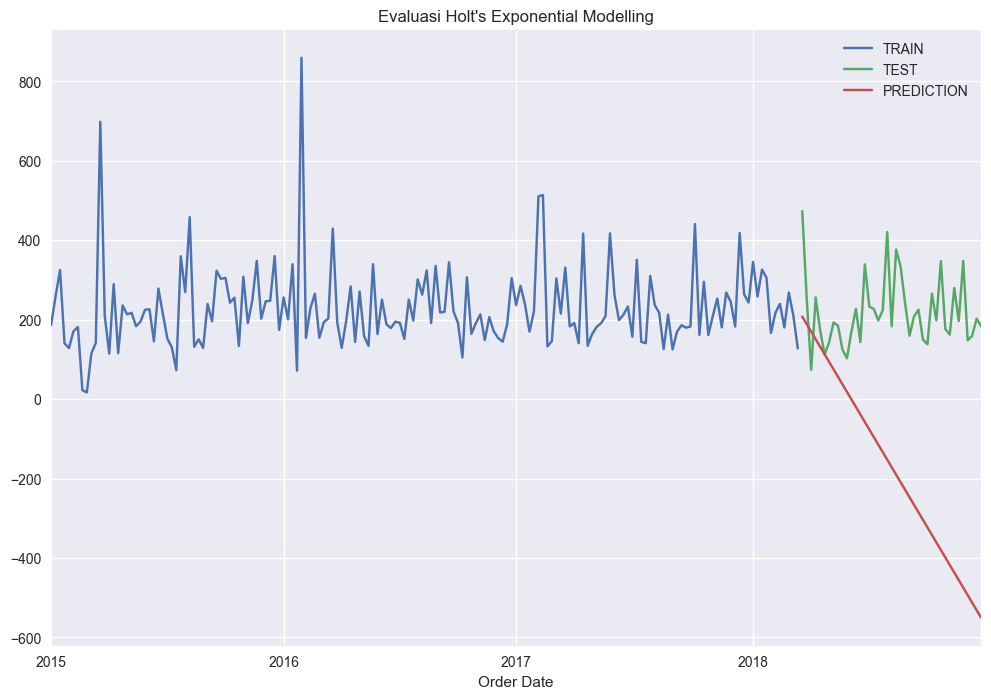

In [39]:
train_data['Sales'].plot(legend=True,label='TRAIN')
test_data['Sales'].plot(legend=True,label='TEST',figsize=(12,8))
prediction_simple.plot(legend=True,label='PREDICTION')
plt.title("Evaluasi Holt's Exponential Modelling");

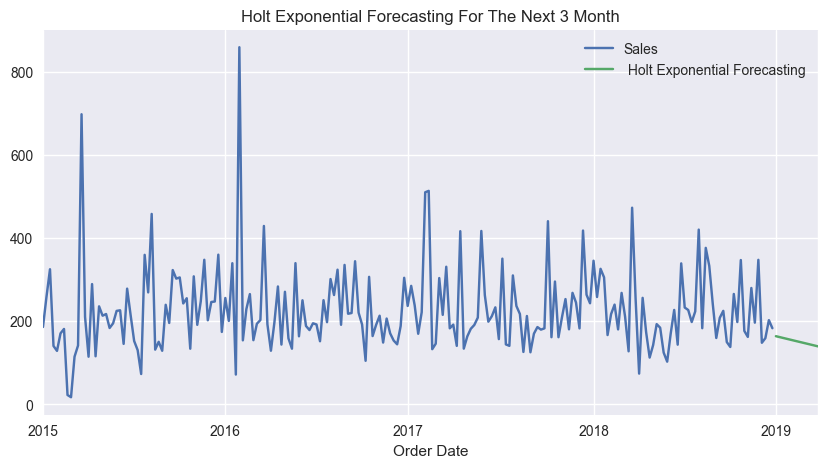

In [40]:
final_model_double = Holt(data_weekly['Sales']).fit(smoothing_level=0.1, smoothing_trend=0.5)
forecast_predictions_double = final_model_double.forecast(len(test_data.tail(13)))

#plot
data_weekly['Sales'].plot(figsize=(10,5), legend=True)
forecast_predictions_double.plot(legend=True, label=' Holt Exponential Forecasting')
plt.title('Holt Exponential Forecasting For The Next 3 Month');

Dari grafik hasil forecast diatas diketahui bahwa metode holt exponential smoothing menghasilkan hasil forecast yang menurun tiap periodenya (ditunjukkan dengan garis lurus berwarna hijau)

In [41]:
result_forecasting['DES'] = forecast_predictions_double.values

In [42]:
result_forecasting

,SES,DES
index,,
2019-01-06,215.229735,164.040709
2019-01-13,215.229735,162.003784
2019-01-20,215.229735,159.966860
2019-01-27,215.229735,157.929935
2019-02-03,215.229735,155.893011
2019-02-10,215.229735,153.856087
2019-02-17,215.229735,151.819162
2019-02-24,215.229735,149.782238
2019-03-03,215.229735,147.745313


Dari kedua hasil diatas diperoleh kesimpulan bahwa __metode exponential smoothing (simple atau double (holt)) kurang cocok digunakan untuk forecasting data sales__, karena bentuk dari __data sales yang kompleks/irreguler__.

<h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; color: #000000; text-align: center; line-height: 0.75;background-color: #F6D55C"><b>ARMA</b></h1>

In [43]:
# finding best p and q
pq_tests = pd.DataFrame()
ps = []
qs = []
BIC = []
AIC = []
HQIC = []

max_p = 7
max_q = 7

for p in range(0, max_p):
    for q in range(0, max_q):
        model = ARIMA(train_data, order=(p, 0, q))
        model_fit = model.fit()
        ps.append(p)
        qs.append(q)
        AIC.append(model_fit.aic)
        BIC.append(model_fit.bic)
        HQIC.append(model_fit.hqic)

pq_tests['p']    = ps
pq_tests['q']    = qs
pq_tests['AIC']  = AIC
pq_tests['BIC']  = BIC
pq_tests['HQIC'] = HQIC
pq_tests.sort_values(by='AIC').head()

,p,q,AIC,BIC,HQIC
0,0,0,2040.223106,2046.471034,2042.758819
17,2,3,2040.571715,2062.439463,2049.446712
23,3,2,2040.850980,2062.718728,2049.725977
7,1,0,2040.980739,2050.352631,2044.784310
1,0,1,2041.015219,2050.387111,2044.818789


**ARMA (2,3)**

`AIC` = 2040.57
`BIC` = 2062.43
`HQIC` = 2049.44

`ARIMA(train_data, order=(2,0,3))` specifies an `ARMA(2,3)` model, where `p=2` is the order of the autoregressive term and `q=3` is the order of the moving average term, and `d=0` means there is no differencing. ARIMA model with order=(2,0,3) is *equivalent* to an ARMA(2,3) model.

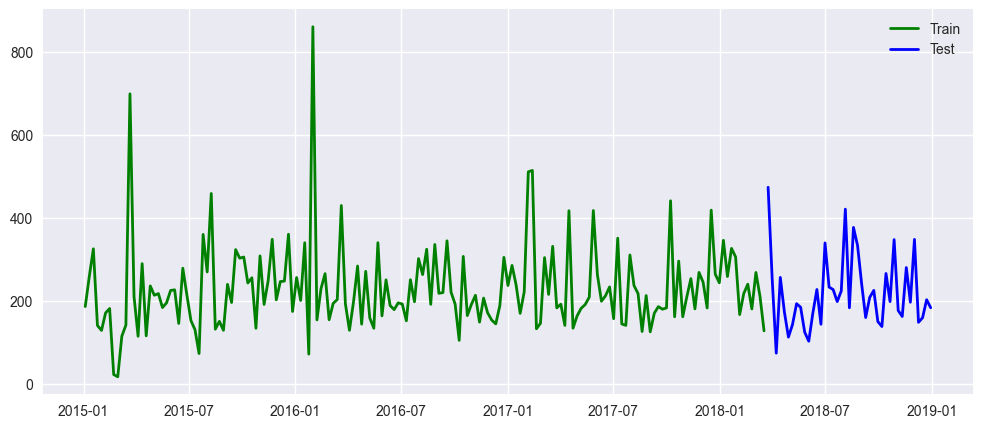

In [44]:
plt.figure(figsize = (12,5))
plt.plot(train_data, color = "green", label = 'Train', lw = 2)
plt.plot(test_data, color = "blue", label = 'Test', lw = 2)
plt.legend();

In [45]:
model_arma = ARIMA(train_data, order=(2, 0, 3)).fit()

In [46]:
print(model_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  168
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -1013.286
Date:                Sat, 25 Mar 2023   AIC                           2040.572
Time:                        23:25:27   BIC                           2062.439
Sample:                    01-04-2015   HQIC                          2049.447
                         - 03-18-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        229.0171      9.971     22.968      0.000     209.474     248.560
ar.L1          0.4720      0.043     10.888      0.000       0.387       0.557
ar.L2         -0.9346      0.045    -20.943      0.0

**the model appears to have limited predictive power, as indicated by the weak evidence of serial correlation and moving average effects, and the large amount of unexplained variation in the sales data**. Therefore, it may be necessary to consider alternative models or improve the data quality to obtain better predictions.

In [47]:
arma_fc = model_arma.predict(start=len(data_weekly),end=len(data_weekly)+12,typ='levels').rename('ARMA (2,3) forecast')

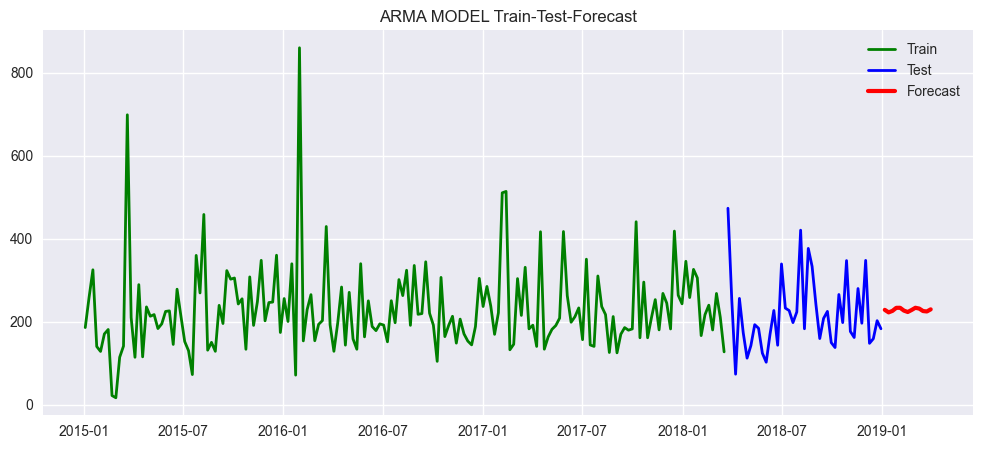

In [48]:
plt.figure(figsize = (12,5))
plt.plot(train_data, color = "green", label = 'Train', lw = 2)
plt.plot(test_data, color = "blue", label = 'Test', lw = 2)
plt.plot(arma_fc, color = "red", label = 'Forecast', lw=3)
plt.title('ARMA MODEL Train-Test-Forecast')
plt.legend();

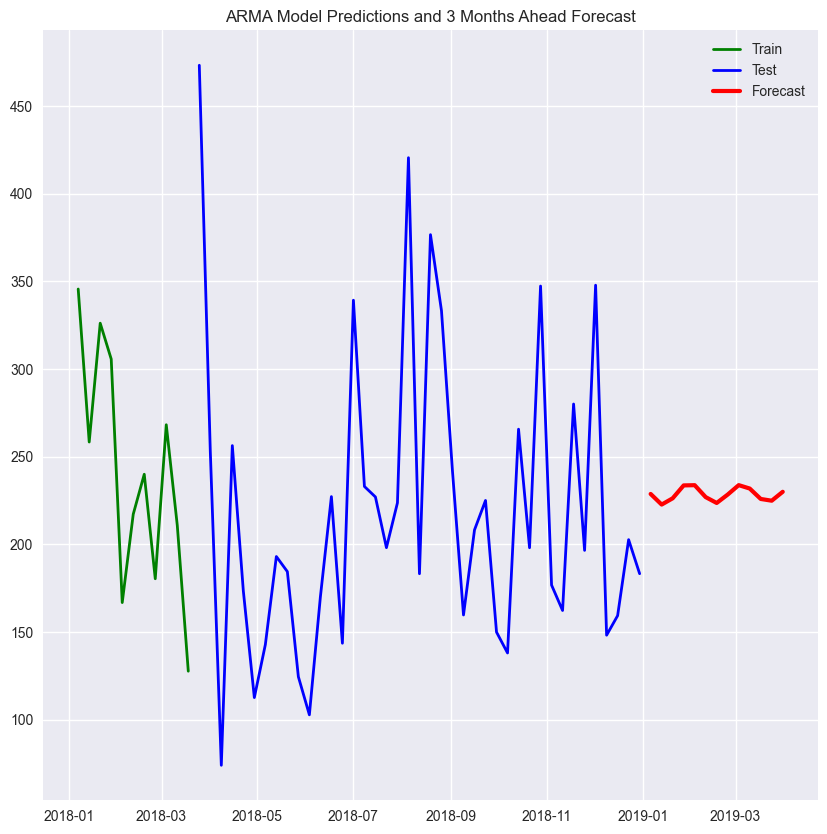

In [49]:
plt.plot(train_data[train_data.index >= '2018'], color = "green", label = 'Train', lw = 2)
plt.plot(test_data[test_data.index >= '2018'], color = "blue", label = 'Test', lw = 2)
plt.plot(arma_fc, color = "red", label = 'Forecast', lw=3)
plt.title('ARMA Model Predictions and 3 Months Ahead Forecast')
plt.legend()
plt.show()

<h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; color: #000000; text-align: center; line-height: 0.75;background-color: #F6D55C"><b>ARIMA</b></h1>

In [50]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(data_weekly,autolag="AIC")
af = pd.DataFrame({"Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"], "Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]})
print(af)

                        Metric        Values
0              Test Statistics -1.547227e+01
1                      p-value  2.620511e-28
2             No. of lags used  0.000000e+00
3  Number of observations used  2.080000e+02
4          critical value (1%) -3.462186e+00
5          critical value (5%) -2.875538e+00
6         critical value (10%) -2.574231e+00


- Nilai p-value menunjukkan angka kurang dari 5%. Oleh karena itu dapat disimpulkan bahwa data stationer

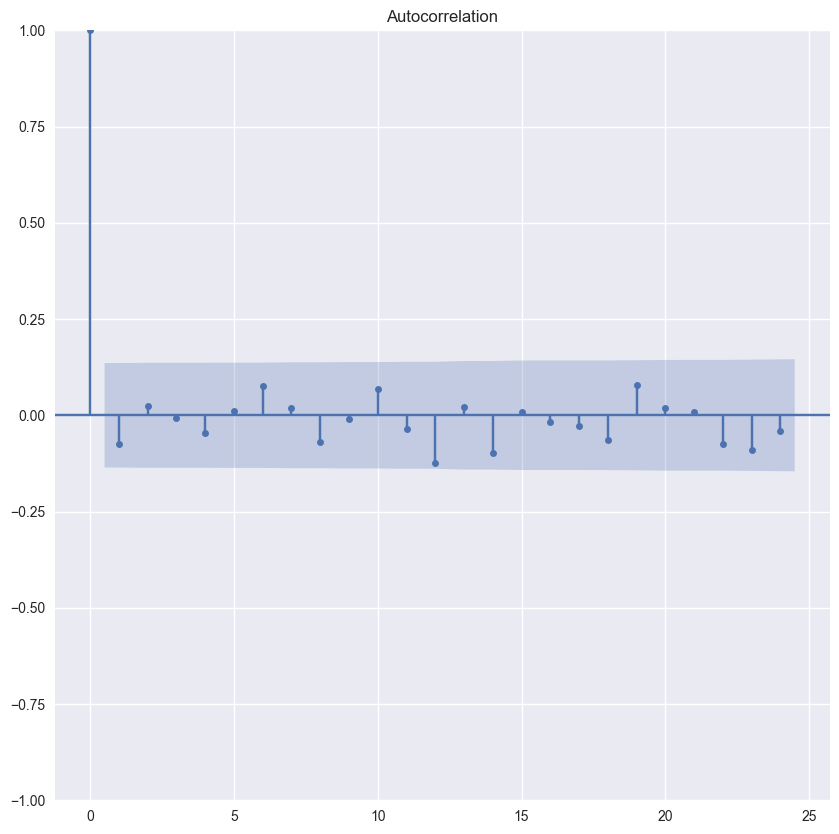

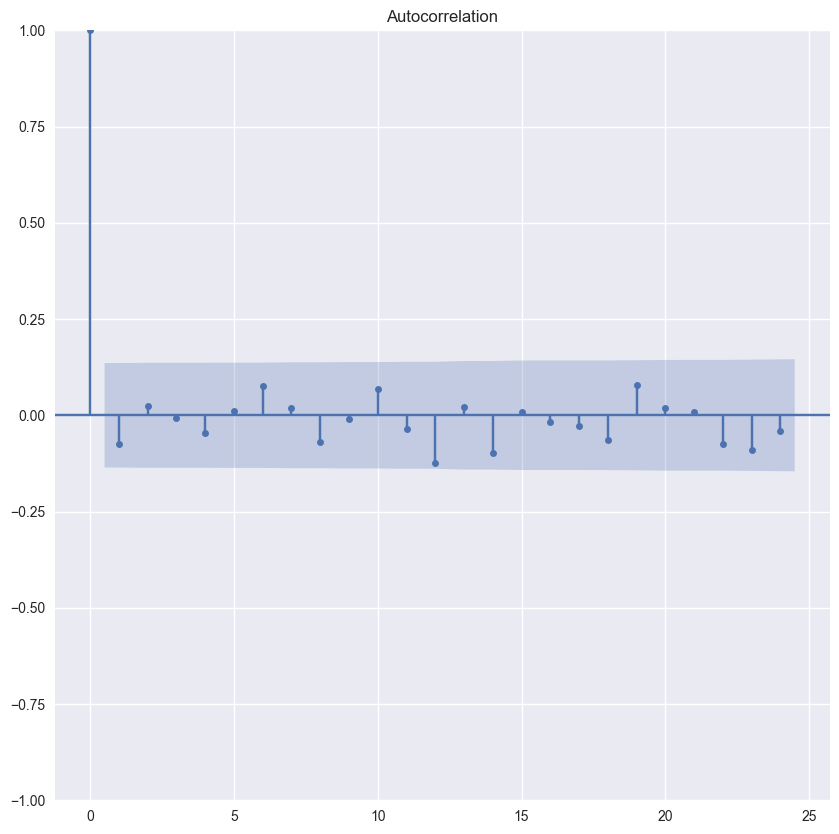

In [51]:
plot_acf(data_weekly)

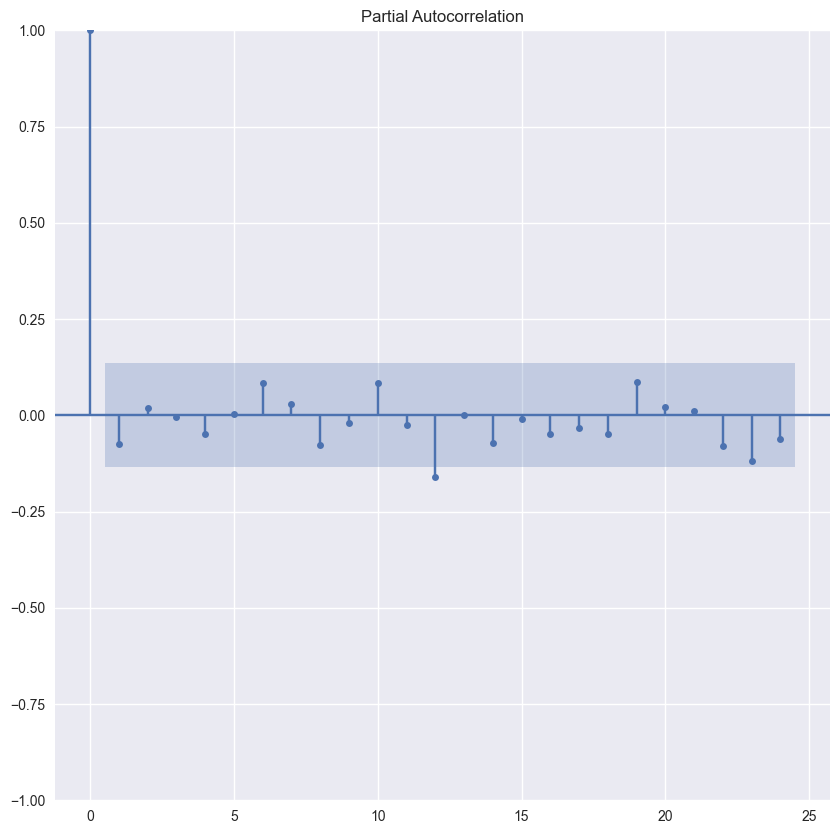

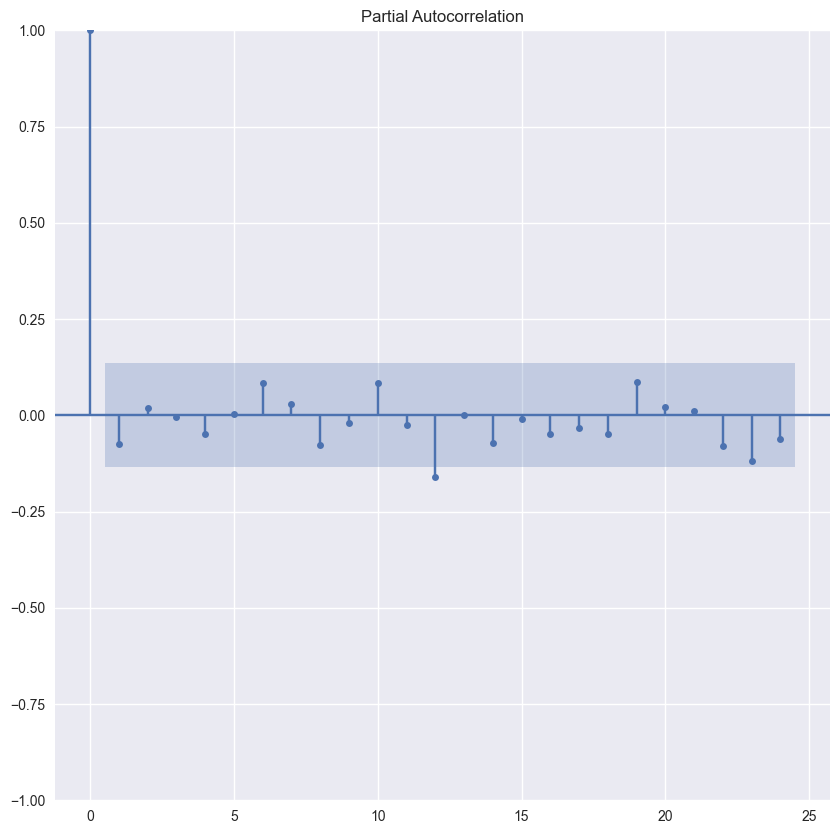

In [52]:
plot_pacf(data_weekly)

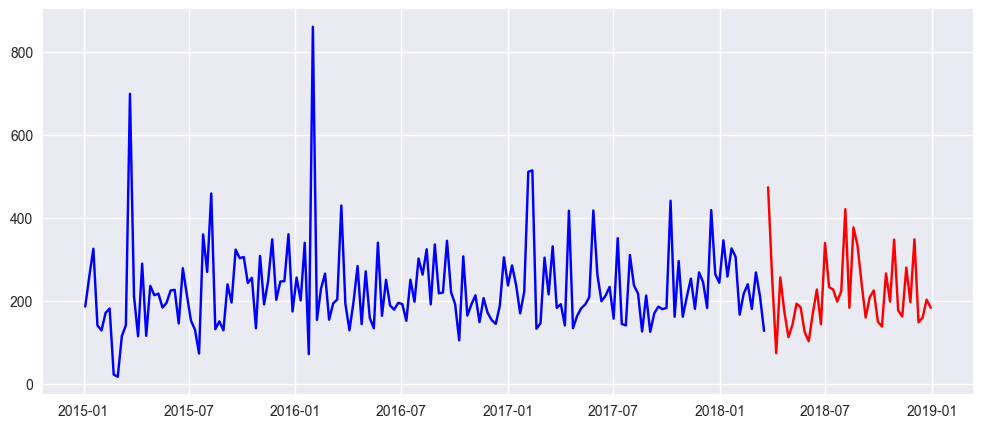

In [53]:
plt.figure(figsize = (12,5))
plt.plot(train_data, color = "blue")
plt.plot(test_data, color = "red")
# plt.title("pergerakan eksport")
# plt.ylabel("ton")
# plt.xlabel('data ke-n')
# sns.set()
plt.show()

In [54]:
model = auto_arima(train_data, start_p=0,start_q=0,max_p=3,max_q=3, seasonal = False,trace=True)
model.fit(train_data)
forecast_test = model.predict(n_periods = len(test_data))
forecast_test = pd.DataFrame(forecast_test, index = test_data.index, columns = ['Prediction'])
print(forecast_test)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2335.812, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2155.218, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2257.448, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2108.738, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2096.188, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2044.581, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2042.946, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2040.981, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2040.223, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2041.016, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2042.974, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.929 seconds
            Prediction
Order Dat

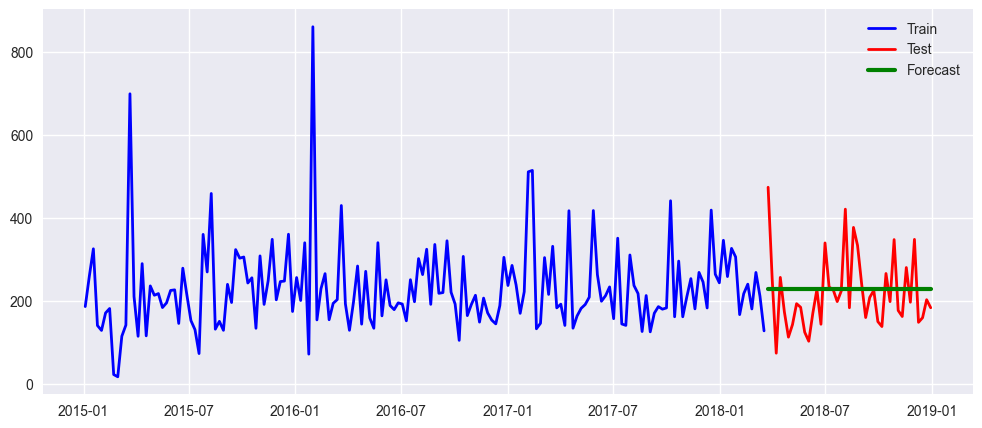

In [55]:
plt.figure(figsize = (12,5))
plt.plot(train_data, color = "blue", label = 'Train', lw = 2)
plt.plot(test_data, color = "red", label = 'Test', lw = 2)
plt.plot(forecast_test, color = "green", label = 'Forecast', lw=3)

plt.legend()
plt.show()

In [56]:
from statsmodels.tools.eval_measures import  rmse

rmse = rmse(test_data, forecast_test)

print(rmse)

[86.9466951]


In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  168
Model:                        SARIMAX   Log Likelihood               -1018.112
Date:                Sat, 25 Mar 2023   AIC                           2040.223
Time:                        23:25:31   BIC                           2046.471
Sample:                    01-04-2015   HQIC                          2042.759
                         - 03-18-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    228.9963     10.632     21.539      0.000     208.158     249.835
sigma2      1.075e+04    653.626     16.444      0.000    9467.170     1.2e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.26   Jarque-Bera (JB):               753.52
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                             2.22
Prob(H) (two-sided):                  0.02   Kurtosis:                        12.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
arima = ARIMA(data_weekly,order=(0,0,0))
results = arima.fit()

In [59]:
#prediksi 3 bulan ke depan/12 minggu
fcast = results.predict(start=len(data_weekly),end=len(data_weekly)+12,typ='levels').rename('ARIMA (0,0,0) forecast')

<Axes: xlabel='Order Date'>

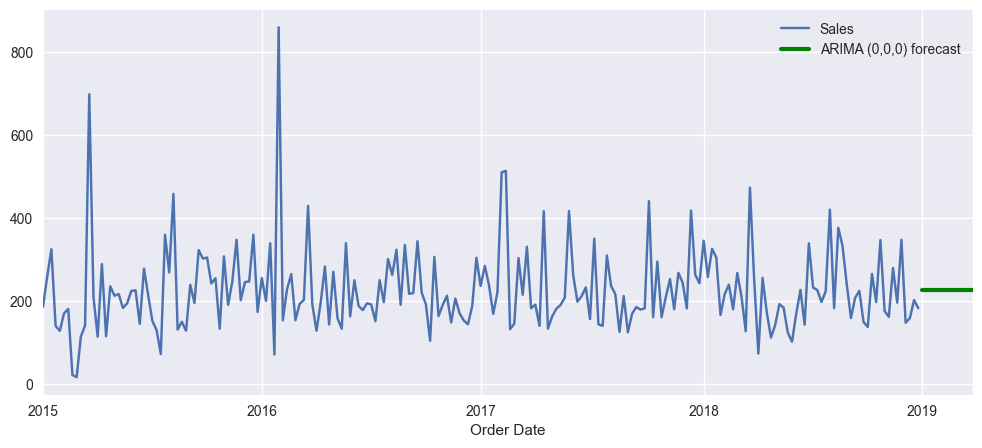

In [60]:
data_weekly.plot(legend=True,figsize=(12,5))
fcast.plot(lw = 3, color = 'green', legend=True)

In [61]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  209
Model:                          ARIMA   Log Likelihood               -1260.270
Date:                Sat, 25 Mar 2023   AIC                           2524.539
Time:                        23:25:31   BIC                           2531.224
Sample:                    01-04-2015   HQIC                          2527.242
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        226.9290      9.062     25.041      0.000     209.167     244.691
sigma2      1.012e+04    556.373     18.195      0.000    9032.744    1.12e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.19   Jarque-Bera (JB):               819.86
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               0.42   Skew:                             2.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; color: #000000; text-align: center; line-height: 0.75;background-color: #F6D55C"><b>SARIMA</b></h1>

## proof seasonality with Kruskal-Wallis test

In [62]:
from scipy.stats import kruskal

def seasonality_test(series):
        seasonal = False
        idx = np.arange(len(series.index)) % 12
        H_statistic, p_value = kruskal(series, idx)
        if p_value <= 0.05:
            seasonal = True
        return seasonal

seasonality_test(df_week)

True

## Define Order (Semi Auto)

In [63]:
# ## Building the SARIMA models

# create a function to generate combinations of input list of no.
def pdq_grid(p, d, q):
    pdq = []
    for i in p:
        for j in d:
            for k in q:
                pdq.append([i, j, k])
    return pdq

def PDQm_grid(P, D, Q, m):
    PDQm = []
    for i in P:
        for j in D:
            for k in Q:
                for l in m:
                    PDQm.append([i, j, k, l])
    return PDQm
    

# possible values of the parameters
p = [0, 1, 2, 12]
d = [0]
q = [0, 1, 2]
P = [0, 1]
D = [0]
Q = [0, 1, 2]
m = [12]

# create all combinations of possible values
pdq = pdq_grid(p, d, q)
PDQm = PDQm_grid(P, D, Q, m)

In [64]:
# create a function for semi-grid-searching SARIMA
def SARIMA_grid(endog, order, seasonal_order):

    # create an empty list to store values
    model_info = []
    
    # filter away errors & warnings due to failture to converge, LU decomposition errors, etc
    import warnings
    warnings.simplefilter("ignore")
    
    #fit the model
    from statsmodels.tools.eval_measures import rmse
    for i in order:
        for j in seasonal_order:
            try:
                model = SARIMAX(endog=endog, order=i, seasonal_order=j)
                result = model.fit()
                predict = result.predict()
            
                # calculate evaluation metrics: MAPE, RMSE, AIC & BIC
                MAPE = (abs((endog-predict)[1:])/(endog[1:])).mean()
                RMSE = rmse(endog[1:], predict[1:])
                AIC = result.aic
                BIC = result.bic
            
                # create a list of order, seasonal order & evaluation metrics
                info = [i, j, MAPE, RMSE, AIC, BIC]
                model_info.append(info)
                
            except:
                continue
            
    # create a dataframe to store info of all models
    columns = ["order", "seasonal_order", "MAPE", "RMSE", "AIC", "BIC"]
    model_info = pd.DataFrame(data=model_info, columns=columns)
    return model_info

In [65]:
# fit all combinations into the model
model_info = SARIMA_grid(endog=train_df, order=pdq, seasonal_order=PDQm)

## Semi-Auto Model Evaluation

In [66]:
# 10 least MAPE models
least_MAPE = model_info.nsmallest(10, "MAPE")
least_MAPE

# 10 least RMSE models
least_RMSE = model_info.nsmallest(10, "RMSE")
least_RMSE

# 10 least AIC models
least_AIC = model_info.nsmallest(10, "AIC")
least_AIC

# 10 least BIC models
least_BIC = model_info.nsmallest(10, "BIC")
least_BIC # the 1st 6 least BIC models are the same as the 1st 6 least AIC models

,order,seasonal_order,MAPE,RMSE,AIC,BIC
35,"[1, 0, 2]","[1, 0, 2, 12]",1.000000,251.711133,14.000000,35.867748
24,"[1, 0, 1]","[0, 0, 0, 12]",0.411773,106.074245,2049.938449,2059.310341
25,"[1, 0, 1]","[0, 0, 1, 12]",0.403494,105.017158,2047.766993,2060.262849
27,"[1, 0, 1]","[1, 0, 0, 12]",0.400443,105.159486,2048.521118,2061.016973
42,"[2, 0, 1]","[0, 0, 0, 12]",0.415854,105.765734,2050.855217,2063.351073
30,"[1, 0, 2]","[0, 0, 0, 12]",0.415694,105.784814,2050.906664,2063.402520
26,"[1, 0, 1]","[0, 0, 2, 12]",0.409773,104.594342,2048.162575,2063.782395
43,"[2, 0, 1]","[0, 0, 1, 12]",0.407379,104.720695,2048.690914,2064.310734
31,"[1, 0, 2]","[0, 0, 1, 12]",0.406791,104.726449,2048.721621,2064.341441
33,"[1, 0, 2]","[1, 0, 0, 12]",0.405567,104.850440,2049.515125,2065.134945


In [67]:
L1 = model_info[model_info.MAPE == model_info.MAPE.min()]
L2 = model_info[model_info.RMSE == model_info.RMSE.min()]
L3 = model_info[model_info.AIC == model_info.AIC.min()]
L4 = least_BIC[least_BIC.MAPE == least_BIC.MAPE.min()]
pd.concat((L1, L2, L3, L4))

,order,seasonal_order,MAPE,RMSE,AIC,BIC
17,"[0, 0, 2]","[1, 0, 2, 12]",0.382850,130.114800,2098.364709,2117.108493
61,"[12, 0, 2]","[0, 0, 1, 12]",0.425288,102.118066,2062.465231,2112.448655
35,"[1, 0, 2]","[1, 0, 2, 12]",1.000000,251.711133,14.000000,35.867748
27,"[1, 0, 1]","[1, 0, 0, 12]",0.400443,105.159486,2048.521118,2061.016973


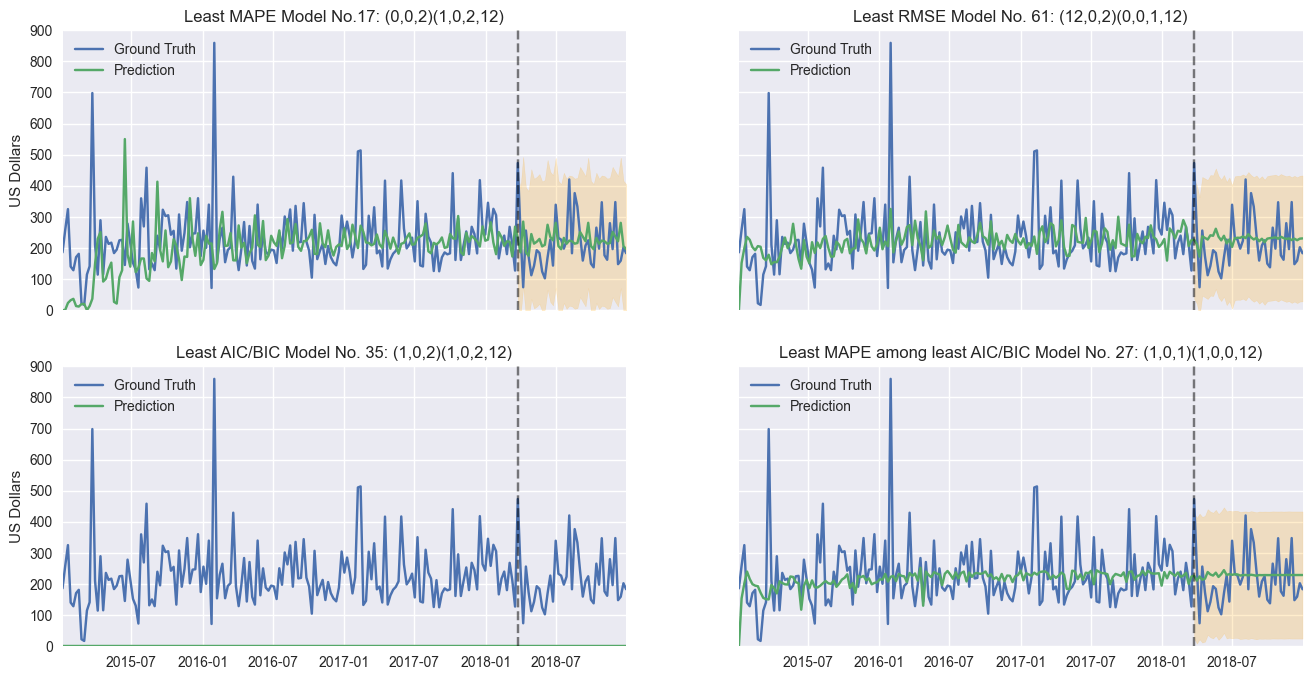

In [68]:
# fit the models of least MAPE, least RMSE, least AIC/BIC & least MAPE among least AIC/BIC
order_list = [(0,0,2), (12,0,2), (1,0,2), (1,0,1)]
seasonal_order_list = [(1,0,2,12), (0,0,1,12), (1,0,2,12), (1,0,0,12)]
y = df_week
pred_list = []
y1 = [] # prediction confidence interval lower boundary
y2 = [] # prediction confidence interval upper boundary

for i in range(4):
    model = SARIMAX(endog=train_df, order=order_list[i],
                    seasonal_order=seasonal_order_list[i])
    result = model.fit()
    pred_summary = result.get_prediction(y.index[0], y.index[-1]).summary_frame()
    pred_list.append(pred_summary['mean'])
    y1.append(pred_summary['mean_ci_lower'][test_df.index])
    y2.append(pred_summary['mean_ci_upper'][test_df.index])


# visualize the results of the fitted models
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,8),
                        sharex=True, sharey=True)

titles = ['Least MAPE Model No.17: (0,0,2)(1,0,2,12)',
          'Least RMSE Model No. 61: (12,0,2)(0,0,1,12)',
          'Least AIC/BIC Model No. 35: (1,0,2)(1,0,2,12)',
          'Least MAPE among least AIC/BIC Model No. 27: (1,0,1)(1,0,0,12)']
k = 0
for i in range(2):
    for j in range(2):
        axs[i,j].plot(y, label='Ground Truth')
        axs[i,j].plot(pred_list[k], label='Prediction')
        axs[i,j].set_title(titles[k])
        axs[i,0].set_ylabel('US Dollars')
        axs[i,j].legend()
        axs[i,j].axvline(test_df.index[0], color='black', alpha=0.5, linestyle='--')
        axs[i,j].fill_between(x=test_df.index, y1=y1[k], y2=y2[k], color='orange', alpha=0.2)
        axs[i,j].set_ylim(bottom=0, top=900)
        axs[i,j].set_xlim(left=y.index[0], right=y.index[-1])
        k += 1
plt.show()

The plots include data from both training and testing sets. The black vertical dotted lines indicate where the training and testing sets were splitted. Obviously, the least MAPE and RMSE models performed better than the least AIC model. In this case, I would go forward to cross-validation with the 10 least MAPE models, which happened to have the least RMSE models too.

## CV for Semi-auto Model

In [69]:
# CV for models with top performance in both MAPE & RMSE
from statsmodels.tools.eval_measures import rmse
semi_mod_cv = []
for i in least_MAPE.index:
    model = SARIMAX(endog=train_df, order=least_MAPE.order[i],
                    seasonal_order=least_MAPE.seasonal_order[i])
    result = model.fit()
    pred = result.get_prediction(test_df.index[0], test_df.index[-1]).summary_frame()['mean']
    CV_MAPE = (abs((test_df-pred))/(test_df)).mean()
    CV_RMSE = rmse(test_df, pred)
    cv_result = [least_MAPE.order[i], least_MAPE.seasonal_order[i], CV_MAPE, CV_RMSE]
    semi_mod_cv.append(cv_result)

columns = ['order', 'seasonal_order', 'CV_MAPE', 'CV_RMSE']
index = least_MAPE.index
semi_mod_cv = pd.DataFrame(data=semi_mod_cv, index=index, columns=columns)


# Cross-validation results of the models
pd.concat((least_MAPE, semi_mod_cv.iloc[:,2:]), axis=1).sort_values('CV_MAPE')

,order,seasonal_order,MAPE,RMSE,AIC,BIC,CV_MAPE,CV_RMSE
40,"[2, 0, 0]","[1, 0, 1, 12]",0.386660,128.981898,2102.007207,2117.627027,0.369829,89.156838
16,"[0, 0, 2]","[1, 0, 1, 12]",0.385988,130.480669,2099.288309,2114.908129,0.377354,89.093677
41,"[2, 0, 0]","[1, 0, 2, 12]",0.384584,127.914156,2102.100171,2120.843955,0.377874,90.316570
4,"[0, 0, 0]","[1, 0, 1, 12]",0.400245,133.208640,2097.349674,2106.721566,0.379629,88.969319
23,"[1, 0, 0]","[1, 0, 2, 12]",0.391131,131.961031,2110.810743,2126.430563,0.380775,89.871797
53,"[2, 0, 2]","[1, 0, 2, 12]",0.399776,104.931458,2055.257037,2080.248749,0.383685,88.590697
51,"[2, 0, 2]","[1, 0, 0, 12]",0.400332,105.025164,2052.035848,2070.779632,0.384453,88.003816
17,"[0, 0, 2]","[1, 0, 2, 12]",0.382850,130.114800,2098.364709,2117.108493,0.388681,90.649878
11,"[0, 0, 1]","[1, 0, 2, 12]",0.396788,132.740587,2098.554192,2114.174012,0.388872,90.571278
5,"[0, 0, 0]","[1, 0, 2, 12]",0.397007,132.781035,2096.630586,2109.126442,0.388925,90.544538


As you can see model no. 40 has the lowest testing MAPE and RMSE. On the other hand, model no. 17, which has the lowest training MAPE, only ranks at 8th on testing MAPE. Let’s plot the forecast of model no. 40.

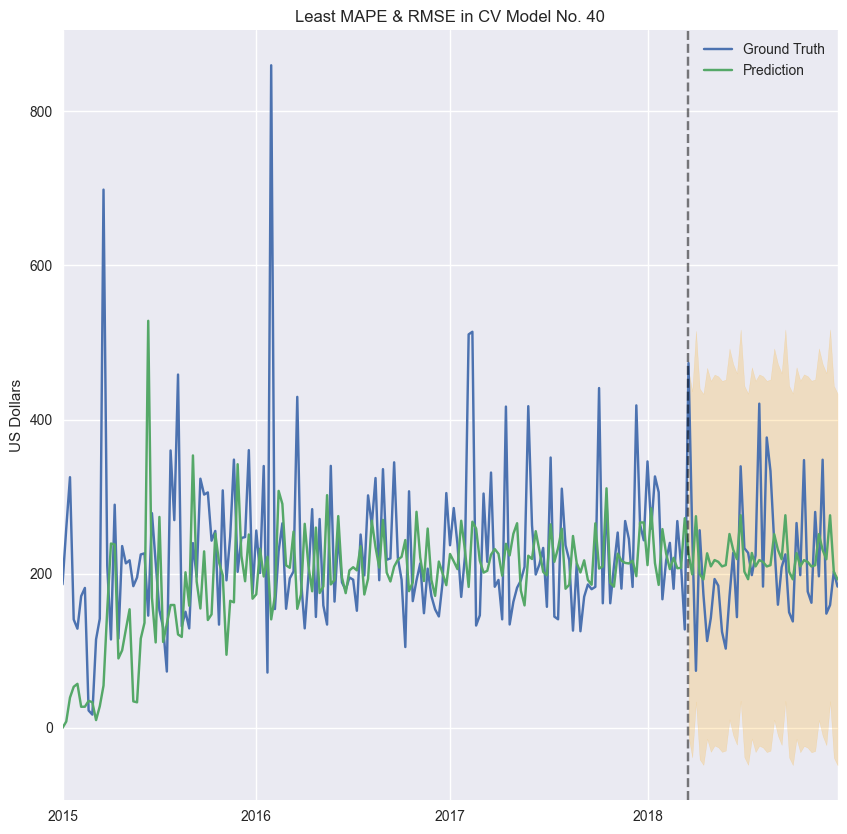

In [70]:
# fit the least CV MAPE model and visualize OOB prediction with CI
model = SARIMAX(endog=train_df, order=(2,0,0), seasonal_order=(1,0,1,12))
result = model.fit()
pred_summary = result.get_prediction(df_week.index[0], df_week.index[-1]).summary_frame()
pred = pred_summary['mean']
pred_ci_ll = pred_summary['mean_ci_lower'][test_df.index]
pred_ci_ul = pred_summary['mean_ci_upper'][test_df.index]

fig, ax = plt.subplots()
pd.concat([df_week, pred], axis=1).plot(title='Least MAPE & RMSE in CV Model No. 40',
                                                    ylabel='US Dollars', ax=ax)
ax.legend(['Ground Truth', 'Prediction'])
plt.fill_between(x=test_df.index, y1=pred_ci_ll, y2=pred_ci_ul, color='orange', alpha=0.2)
plt.axvline(x=test_df.index[0], color="black", alpha=0.5, linestyle="--")

## Define Order (Auto)

In [71]:
# exhaustive grid-search
gs_model = pm.auto_arima(df_week, max_p=3, max_q=3,
                         max_D=1, max_P=2, max_Q=2,  m=12,
                         information_criterion='oob', trace=True,
                         out_of_sample_size=len(test_df), 
                         error_action='ignore', max_order=None, stepwise=False)

# stepwise search
step_model = pm.auto_arima(df_week, information_criterion='oob',
                           trace=True, out_of_sample_size=len(test_df),
                           error_action='ignore', max_order=None)

 ARIMA(0,0,0)(0,0,0)[12] intercept   : OOB=7559.728, Time=0.06 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : OOB=7786.322, Time=0.20 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : OOB=7901.387, Time=0.40 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : OOB=7702.306, Time=0.33 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : OOB=7805.909, Time=0.44 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : OOB=7907.249, Time=1.00 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : OOB=7813.720, Time=0.76 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : OOB=7939.013, Time=1.22 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : OOB=7853.169, Time=1.72 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : OOB=7464.510, Time=0.11 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : OOB=7695.750, Time=0.25 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : OOB=7801.512, Time=0.62 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : OOB=7610.693, Time=0.44 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : OOB=7709.407, Time=0.41 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : OOB=7805.526, Time=0.92

 ARIMA(3,0,1)(2,0,1)[12] intercept   : OOB=7727.673, Time=1.95 sec
 ARIMA(3,0,1)(2,0,2)[12] intercept   : OOB=7580.535, Time=2.02 sec
 ARIMA(3,0,2)(0,0,0)[12] intercept   : OOB=7534.565, Time=0.30 sec
 ARIMA(3,0,2)(0,0,1)[12] intercept   : OOB=7798.629, Time=0.78 sec
 ARIMA(3,0,2)(0,0,2)[12] intercept   : OOB=7862.517, Time=1.72 sec
 ARIMA(3,0,2)(1,0,0)[12] intercept   : OOB=7689.950, Time=0.83 sec
 ARIMA(3,0,2)(1,0,1)[12] intercept   : OOB=7733.741, Time=0.98 sec
 ARIMA(3,0,2)(1,0,2)[12] intercept   : OOB=7635.608, Time=1.80 sec
 ARIMA(3,0,2)(2,0,0)[12] intercept   : OOB=7753.195, Time=1.86 sec
 ARIMA(3,0,2)(2,0,1)[12] intercept   : OOB=7668.520, Time=2.12 sec
 ARIMA(3,0,2)(2,0,2)[12] intercept   : OOB=inf, Time=2.21 sec
 ARIMA(3,0,3)(0,0,0)[12] intercept   : OOB=inf, Time=0.56 sec
 ARIMA(3,0,3)(0,0,1)[12] intercept   : OOB=inf, Time=0.82 sec
 ARIMA(3,0,3)(0,0,2)[12] intercept   : OOB=7928.296, Time=1.78 sec
 ARIMA(3,0,3)(1,0,0)[12] intercept   : OOB=7700.367, Time=0.96 sec
 ARIMA(3,0

## All Models Comparison

In [72]:
# fit model no. 40, no. 17, least OOB MSE model by grid-search &
# least OOB MSE model by stepwise search from results of auto_arima

order_list = [(2,0,0), (0,0,2), (1,0,0), (0,0,0)]
seasonal_order_list = [(1,0,1,12), (1,0,2,12), (0,0,0,12), (0,0,0,0)]
pred_list = []
y1 = [] # prediction confidence interval lower boundary
y2 = [] # prediction confidence interval upper boundary
gd_mod_cv = []

for i in range(4):
    model = SARIMAX(endog=train_df, order=order_list[i],
                    seasonal_order=seasonal_order_list[i])
    result = model.fit()
    pred_summary = result.get_prediction(df_week.index[0], df_week.index[-1]).summary_frame()
    pred = pred_summary['mean']
    pred_list.append(pred)
    y1.append(pred_summary['mean_ci_lower'][test_df.index])
    y2.append(pred_summary['mean_ci_upper'][test_df.index])
    CV_MAPE = (abs((test_df - pred[test_df.index]))/(test_df)).mean()
    CV_RMSE = rmse(test_df, pred[test_df.index])
    AIC = result.aic
    BIC = result.bic
    cv_result = [order_list[i], seasonal_order_list[i], CV_MAPE, CV_RMSE, AIC, BIC]
    gd_mod_cv.append(cv_result)
    
columns = ['order', 'seasonal_order', 'CV_MAPE', 'CV_RMSE', 'AIC', 'BIC']
index = [40, 17, 'grid', 'stepwise']
gd_mod_cv = pd.DataFrame(data=gd_mod_cv, index=index, columns=columns)
gd_mod_cv

,order,seasonal_order,CV_MAPE,CV_RMSE,AIC,BIC
40,"(2, 0, 0)","(1, 0, 1, 12)",0.369829,89.156838,2102.007207,2117.627027
17,"(0, 0, 2)","(1, 0, 2, 12)",0.388681,90.649878,2098.364709,2117.108493
grid,"(1, 0, 0)","(0, 0, 0, 12)",0.920694,222.677461,2155.218198,2161.466126
stepwise,"(0, 0, 0)","(0, 0, 0, 0)",1.000000,234.888200,2335.812327,2338.936291


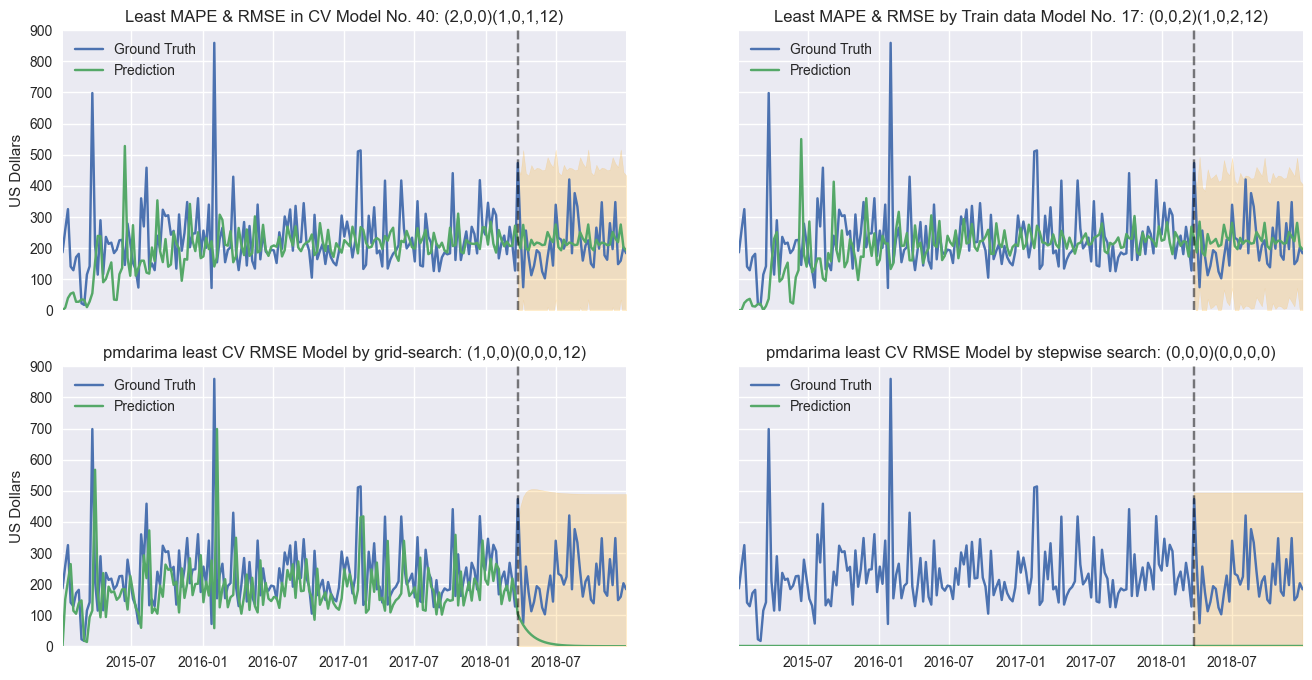

In [73]:
# visualize the results of the fitted models
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,8),
                        sharex=True, sharey=True)

titles = ['Least MAPE & RMSE in CV Model No. 40: (2,0,0)(1,0,1,12)',
          'Least MAPE & RMSE by Train data Model No. 17: (0,0,2)(1,0,2,12)',
          'pmdarima least CV RMSE Model by grid-search: (1,0,0)(0,0,0,12)',
          'pmdarima least CV RMSE Model by stepwise search: (0,0,0)(0,0,0,0)']

k = 0
for i in range(2):
    for j in range(2):
        axs[i,j].plot(y, label='Ground Truth')
        axs[i,j].plot(pred_list[k], label='Prediction')
        axs[i,j].set_title(titles[k])
        axs[i,0].set_ylabel('US Dollars')
        axs[i,j].legend()
        axs[i,j].axvline(test_df.index[0], color='black', alpha=0.5, linestyle='--')
        axs[i,j].fill_between(x=test_df.index, y1=y1[k], y2=y2[k], color='orange', alpha=0.2)
        axs[i,j].set_ylim(bottom=0, top=900)
        axs[i,j].set_xlim(left=y.index[0], right=test_df.index[-1])
        k += 1
plt.show()

## Chosen Model Diagnostic Test

In [74]:
#ARIMA(2, 0, 0)x(1, 0, 1, 12)
mod = sm.tsa.statespace.SARIMAX(df_week,
                                order=(2, 0, 0),
                                seasonal_order=(1, 0, 1, 12))
results = mod.fit(method = 'powell')
print(results.summary().tables[1])

Optimization terminated successfully.
         Current function value: 6.224888
         Iterations: 6
         Function evaluations: 358
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3938      0.055      7.191      0.000       0.286       0.501
ar.L2          0.4575      0.042     10.778      0.000       0.374       0.541
ar.S.L12       0.9414      0.180      5.239      0.000       0.589       1.294
ma.S.L12      -0.8907      0.242     -3.681      0.000      -1.365      -0.416
sigma2      1.494e+04    841.547     17.756      0.000    1.33e+04    1.66e+04


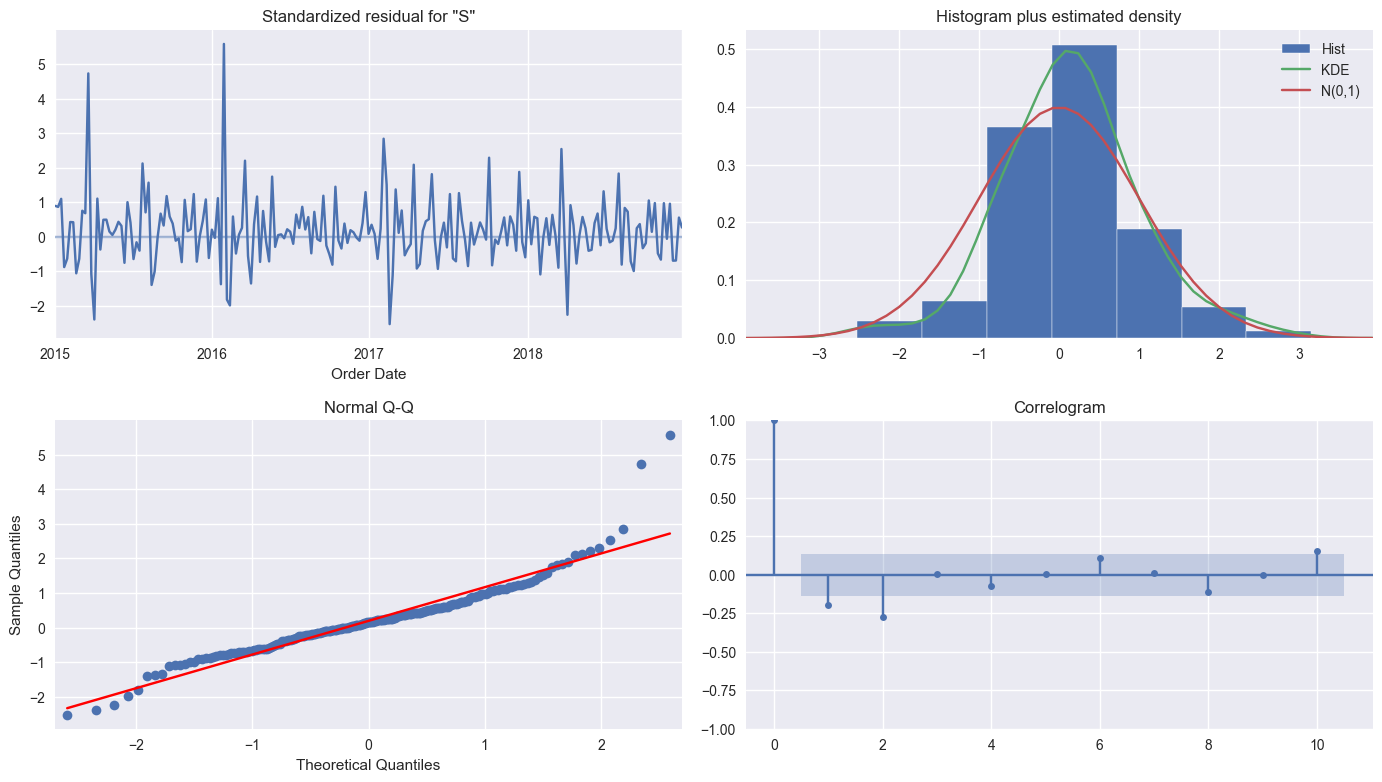

In [75]:
results.plot_diagnostics(figsize=(14, 8))
plt.tight_layout()
plt.show()

As we can see from the image above, the residuals are uncorrelated and have most likely zero mean. Hence we can say the model is fitted well.

## Forecasting

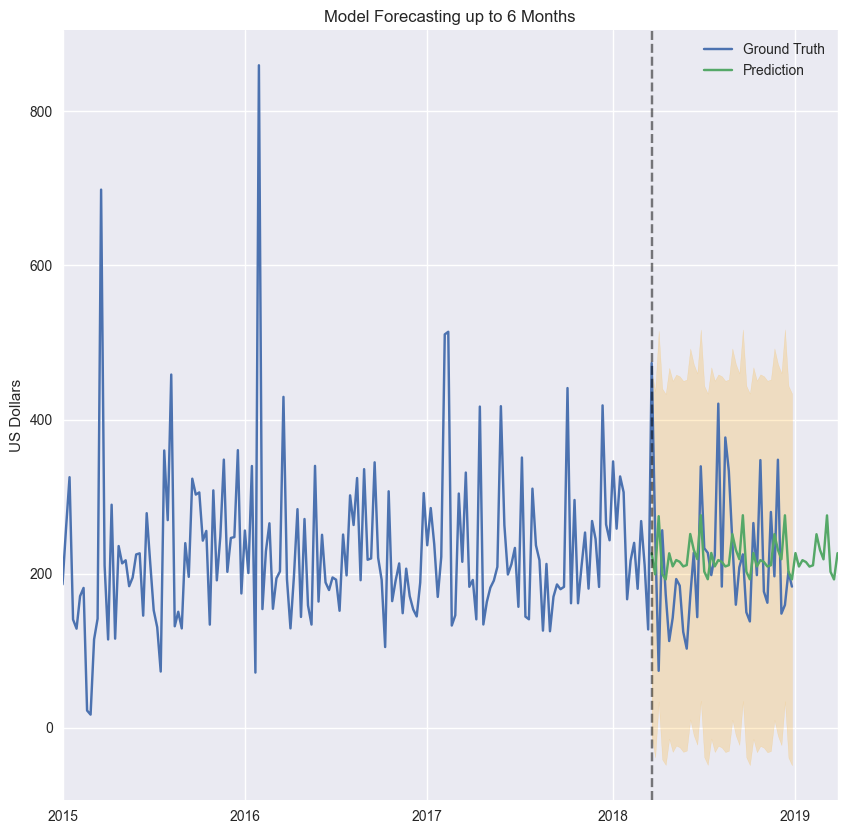

In [76]:
model = SARIMAX(endog=train_df, order=(2,0,0), seasonal_order=(1,0,1,12))
result = model.fit()
pred_summary = result.get_prediction(test_df.index[0], '2019-03-31').summary_frame()
pred = pred_summary['mean']
pred_ci_ll = pred_summary['mean_ci_lower'][test_df.index]
pred_ci_ul = pred_summary['mean_ci_upper'][test_df.index]

fig, ax = plt.subplots()
pd.concat([df_week, pred], axis=1).plot(title='Model Forecasting up to 6 Months',
                                                    ylabel='US Dollars', ax=ax)
ax.legend(['Ground Truth', 'Prediction'])
plt.fill_between(x=test_df.index, y1=pred_ci_ll, y2=pred_ci_ul, color='orange', alpha=0.2)
plt.axvline(x=test_df.index[0], color="black", alpha=0.5, linestyle="--")

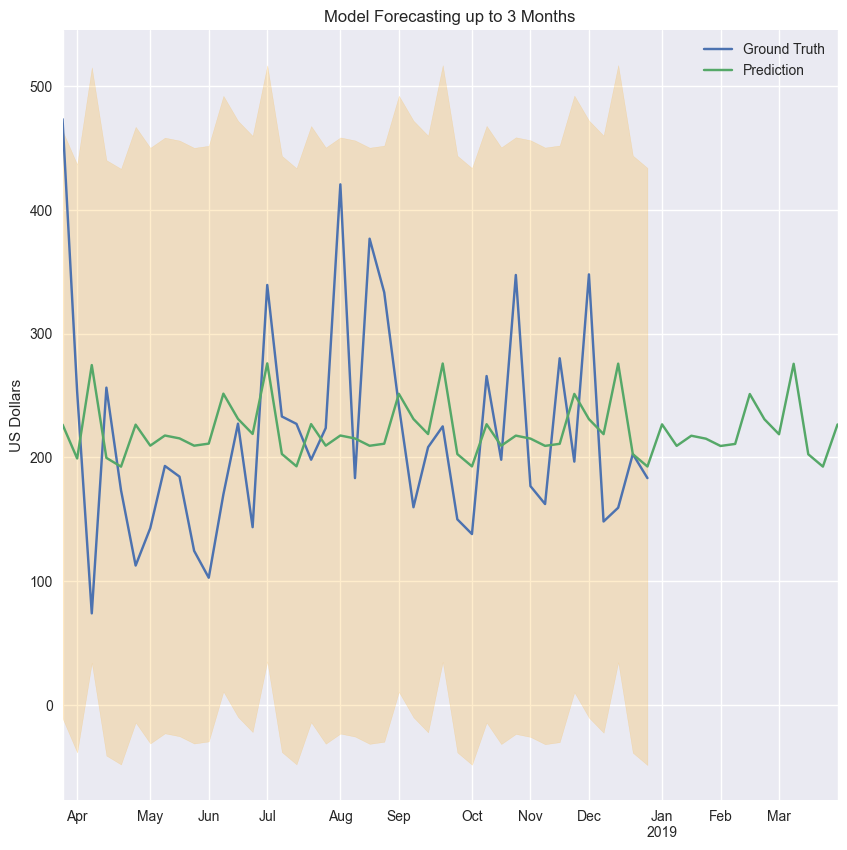

In [77]:
model = SARIMAX(endog=train_df, order=(2,0,0), seasonal_order=(1,0,1,12))
result = model.fit()
pred_summary = result.get_prediction(test_df.index[0], '2019-03-31').summary_frame()
pred = pred_summary['mean']
pred_ci_ll = pred_summary['mean_ci_lower'][test_df.index]
pred_ci_ul = pred_summary['mean_ci_upper'][test_df.index]

fig, ax = plt.subplots()
pd.concat([test_df, pred], axis=1).plot(title='Model Forecasting up to 3 Months',
                                                    ylabel='US Dollars', ax=ax)
ax.legend(['Ground Truth', 'Prediction'])
plt.fill_between(x=test_df.index, y1=pred_ci_ll, y2=pred_ci_ul, color='orange', alpha=0.2)

__Forecasting Summary__:<br>
It seems that we are a bit off in our predictions. In fact, the predicted transaction is essentially can't follow the cyclical & volatile trend, meaning that our model is probably not performing well. Again, this is not due to our procedure, but to the fact that predicting future transaction is essentially impossible.

<h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; color: #ffffff; text-align: center; line-height: 0.75;background-color: #000000"><b>Kesimpulan</b></h1>

In [78]:
pred_sum = result.predict(len(df_week), '2019-03-31')

In [79]:
result_forecasting['ARIMA'] = fcast.values
result_forecasting['SARIMA'] = pred_sum.values
result_forecasting['ARMA'] = arma_fc.values

<Axes: xlabel='index'>

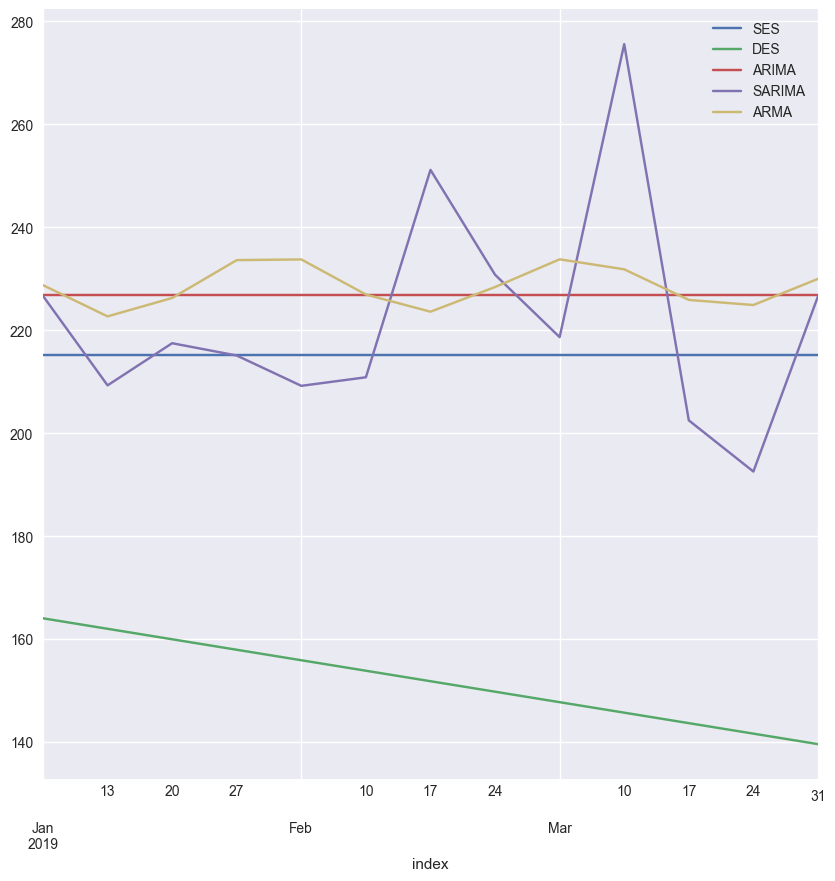

In [80]:
result_forecasting.plot()

__Insight:__
> - Ship Mode dengan jenis Standard Class memiliki jeda pengiriman yang lebih lama dibandingkan dengan jenis ship mode lainya
> - Negara bagian Wyoming memiliki penjualan tertinggi dan negara bagian South Dakota memiliki penjualan terendah
> - Sub-category Phone dan Chairs memiliki penjualan tertinggi
> - Kota New York dan Los Angeles memiliki penjualan tertinggi. hal ini masuk akal karena kedua kota tersebut adalah kota dengan biaya hidup yang mahal, sehingga harga satuan untuk barang sangat mahal
> - Kebanyakan customer kurang loyal untuk sering membeli barang di super store.
> - Total pendapatan yang diperoleh toko dari tahun 2015 sampai 2018 sebesar 153385 dolar dengan produk canon imageclass 2200
> - Jenis pengiriman standard class merupakan jenis pengiriman barang yang paling lama prosesnya

__Model:__
> - Analisis ini menggunakan 5 metode runtun waktu, yaitu Simple Exponential Smoothing, Holt's Exponential Smoothing, ARMA, ARIMA, SARIMA
> - Dari keempat metode yang sudah disebutkan metode SARIMA yang terbaik dengan nilai RMSE 89.15